In [5]:
import pandas as pd
import numpy as np

# intents prompting temp

In [6]:
alltweets = pd.read_excel("tweetset.xlsx",sheet_name='Sheet1', header=0)

In [7]:
alltweets

,Unnamed: 0,index,tweet,topic,intents_intersection,intents_union,intents_full_match
0,0,0,Anthony Fauci offers a timeline for ending COV...,{'HEALTHCARE: HEALTH GOVERNING BODY AND OFFICI...,{'RECOMMEND: RECOMMEND RESOURCE: recommends a ...,{'PROVIDE INFORMATION: PROVIDE INFORMATION INF...,False
1,1,1,I think your trying to find reason in a place ...,{'OTHER: CANNOT CODE: the topic cannot be dete...,{'CRITICIZE: CRITICIZE OTHER: criticizes topic...,{'CRITICIZE: CRITICIZE OTHER: criticizes topic...,True
2,2,2,@RepSchneider @SBAgov @jimmy_dore @miserableli...,{'ECONOMY AND SOCIETY: RELIEF: relief packages...,{'CRITICIZE: CRITICIZE GOVERNMENT: criticizes ...,{'CRITICIZE: CRITICIZE GOVERNMENT: criticizes ...,True
3,3,3,COVID-19 and cancer https://t.co/d2ITRNl2vS ht...,{'SYMPTOMS AND SPREAD: OTHER CONDITION: COVID ...,set(),{'PROVIDE INFORMATION: PROVIDE INFORMATION OTH...,False
4,4,4,Thank you @JoyYWu and @eozdalga! 2020 has been...,{'HEALTHCARE: HEALTHCARE COLLABORATIONS: colla...,{'PRAISE: PRAISE INDIVIDUALS OR GROUP OR COLLA...,{'PRAISE: PRAISE VACCINE: praises vaccines or ...,False
...,...,...,...,...,...,...,...
6869,7996,7996,On local TV news interviewed by @DrJo_Fox abou...,"{""HEALTHCARE: HEALTHCARE OWN WORK: one's own w...",{'PROMOTE OWN WORK: PROMOTE OWN WORK: promotes...,{'PROMOTE OWN WORK: PROMOTE OWN WORK: promotes...,True
6870,7997,7997,@lewis_goodall @ianw2000uk No doctor or optome...,{'ECONOMY AND SOCIETY: GOVERNMENT RESPONSE: ho...,set(),{'CRITICIZE: CRITICIZE GOVERNMENT: criticizes ...,False
6871,7998,7998,The fourth wave of COVID-19 cases is here. Wil...,{'SYMPTOMS AND SPREAD: SURGES AND WAVES: surge...,{'PROVIDE INFORMATION: PROVIDE INFORMATION PRE...,{'PROVIDE INFORMATION: PROVIDE INFORMATION PRE...,True
6872,7999,7999,If recovered for more than 10 days based on me...,{'SYMPTOMS AND SPREAD: INFECTION AND TRANSMISS...,set(),{'PROVIDE INFORMATION: PROVIDE INFORMATION PRE...,False


In [8]:
criticize = 'CRITICIZE: To blame, to find fault with'
praise = 'PRAISE: To admire, to commend'
predict = 'PREDICT: To make a guess about what will happen in the future'
provide = 'PROVIDE INFORMATION: To tell or share information with the audience'
recommend = 'RECOMMEND: To make a suggestion, to encourage the audience to do something'
seekinfo = 'SEEK INFORMATION: To ask the audience a question'

ocriticize = 'CRITICIZE: CRITICIZE OTHER: criticizes topic not described above'
opraise = 'PRAISE: PRAISE OTHER: praises topic not described above'
opredict = 'PREDICT: PREDICT OTHER: predicts topic not described above'
oprovide = 'PROVIDE INFORMATION: PROVIDE INFORMATION OTHER: provides information on topic not described above'
orecommend = 'RECOMMEND: RECOMMEND OTHER: recommends topic not listed above'
oseekinfo = 'SEEK INFORMATION: SEEK INFORMATION OTHER: seeks information on topic not described above'

intdict = {}
intdict[ocriticize] = criticize
intdict[opraise] = praise
intdict[opredict] = predict
intdict[oprovide] = provide
intdict[orecommend] = recommend
intdict[oseekinfo] = seekinfo

gpt_index = []
gpt_tweets = []
gpt_topics = []
gpt_intents = []

for x in alltweets.loc[alltweets['intents_full_match'] == False, ["tweet", "intents_intersection", "intents_union", "index", "topic"]].values:

    for element in x[2]:

        if element not in x[1]: 
            
            if element != 'OTHER: OTHER: other intent not mentioned above' and element != 'CANNOT CODE: CANNOT CODE: cannot code intent':
                
                    
                s = ""
                for i, topic in enumerate(x[4]):
                    s += topic
                    if i != len(x[4]) - 1:
                        s+= ", "
                
                if s != "":
                    gpt_topics.append(s)

                    gpt_index.append(x[3])
                    gpt_tweets.append(x[0])
                    if element in intdict:
                        gpt_intents.append(intdict[element])
                    else:
                        gpt_intents.append(element)
                    
                
            
    
gpt_index = np.array(gpt_index)          
gpt_tweets = np.array(gpt_tweets)
gpt_intents = np.array(gpt_intents)
gpt_topics = np.array(gpt_topics)


intents_df = pd.DataFrame()
intents_df['index'] = gpt_index
intents_df['tweet'] = gpt_tweets
intents_df['topics'] = gpt_topics
intents_df['intent'] = gpt_intents

# intentnumdict = {}

# count = 0

# for i, index in enumerate(gpt_index):
#     if index in intentnumdict:
#         if extract_topic_intent(gpt_intents[i]) in intentnumdict[index]:
#             count += 1
#         else:
#             intentnumdict[index].add(extract_topic_intent(gpt_intents[i]))
#     else:
#         intentnumdict[index] = set()
#         intentnumdict[index].add(extract_topic_intent(gpt_intents[i]))
        
# print(count)
    


In [9]:
intents_df.to_excel('intents_for_gpt.xlsx')

# Load Jared, Felicia, Tung's Annotations

In [10]:
jared = pd.read_excel("Coding_JMcNeal.xlsx",sheet_name='Tweets', header=0)

In [11]:
felicia = pd.read_excel("twittercovid_dataFTv4.xlsx",sheet_name='Tweets', header=0)

In [12]:
tung = pd.read_excel("twittercovid_dataTLv4.xlsx",sheet_name='Tweets', header=0)

# Merge Felicia + Tung's Annotations

In [13]:
def isNaN(string):
    return string != string

In [14]:
# combining felicia and tung's annotations

tweets = jared['tweet'].values
time_blocks = jared['time block'].values
tweet_ids = jared['tweet id'].values
dates = jared['date'].values

felicia_topic1 = felicia['topic1'].values
felicia_topic2 = felicia['topic2'].values
felicia_topic3 = felicia['topic3'].values
felicia_topic4 = felicia['topic4'].values
felicia_topic5 = felicia['topic5'].values
felicia_topic6 = felicia['topic6'].values

felicia_intent1 = felicia['intent1'].values
felicia_intent2 = felicia['intent2'].values
felicia_intent3 = felicia['intent3'].values
felicia_intent4 = felicia['intent4'].values

tung_topic1 = tung['topic1'].values
tung_topic2 = tung['topic2'].values
tung_topic3 = tung['topic3'].values
tung_topic4 = tung['topic4'].values
tung_topic5 = tung['topic5'].values
tung_topic6 = tung['topic6'].values

tung_intent1 = tung['intent1'].values
tung_intent2 = tung['intent2'].values
tung_intent3 = tung['intent3'].values
tung_intent4 = tung['intent4'].values

# make felicia + tung annotations

ft_topic1 = []
ft_topic2 = []
ft_topic3 = []
ft_topic4 = []
ft_topic5 = []
ft_topic6 = []

ft_intent1 = []
ft_intent2 = []
ft_intent3 = []
ft_intent4 = []

for i, tweet in enumerate(tweets):
    
    if not isNaN(felicia_topic1[i]) or not isNaN(felicia_topic2[i]):
        ft_topic1.append(felicia_topic1[i])
        ft_topic2.append(felicia_topic2[i])
        ft_topic3.append(felicia_topic3[i])
        ft_topic4.append(felicia_topic4[i])
        ft_topic5.append(felicia_topic5[i])
        ft_topic6.append(felicia_topic6[i])
    else:
        ft_topic1.append(tung_topic1[i])
        ft_topic2.append(tung_topic2[i])
        ft_topic3.append(tung_topic3[i])
        ft_topic4.append(tung_topic4[i])
        ft_topic5.append(tung_topic5[i])
        ft_topic6.append(tung_topic6[i])

    if not isNaN(felicia_intent1[i]):
        ft_intent1.append(felicia_intent1[i])
        ft_intent2.append(felicia_intent2[i])
        ft_intent3.append(felicia_intent3[i])
        ft_intent4.append(felicia_intent4[i])
    else:
        ft_intent1.append(tung_intent1[i])
        ft_intent2.append(tung_intent2[i])
        ft_intent3.append(tung_intent3[i])
        ft_intent4.append(tung_intent4[i])


ft = pd.DataFrame()
ft['time block'] = time_blocks
ft['date'] = dates
ft['tweet id'] = tweet_ids
ft['tweet'] = tweets
ft['topic1'] = np.array(ft_topic1)
ft['topic2'] = np.array(ft_topic2)
ft['topic3'] = np.array(ft_topic3)
ft['topic4'] = np.array(ft_topic4)
ft['topic5'] = np.array(ft_topic5)
ft['topic6'] = np.array(ft_topic6)
ft['intent1'] = np.array(ft_intent1)
ft['intent2'] = np.array(ft_intent2)
ft['intent3'] = np.array(ft_intent3)
ft['intent4'] = np.array(ft_intent4)

ft.head(15)

ft.to_csv("ft.csv") 

# Compare 2 sets of annotations

In [21]:
def extract_topic_intent(string):
    words = string.split(':')
    return words[0]

print(extract_topic_intent('PROVIDE INFORMATION: PROVIDE INFORMATION PREVALENCE OR MORTALITY: provides information on prevalence or mortality rates'))

PROVIDE INFORMATION


In [22]:
# Looking at Jared's and FT's data

indices = []

jared_topic1 = jared['Topic 1'].values
jared_topic2 = jared['Topic 2'].values
jared_topic3 = jared['Topic 3'].values
jared_topic4 = jared['Topic 4'].values
jared_topic5 = jared['Topic 5'].values

jared_intent1 = jared['Intent 1'].values
jared_intent2 = jared['Intent 2'].values
jared_intent3 = jared['Intent 3'].values

ft_topics = []
ft_subtopics = []
jared_topics = []
jared_subtopics = []
topics_full_match = []
topics_partial_match = []
topics_no_match = []
topics_intersection = []
topics_union = []

ft_intents = []
jared_intents = []
intents_full_match = []
intents_partial_match = []
intents_no_match = []
intents_intersection = []
intents_union = []

for i, tweet in enumerate(tweets):
    # topics 
    indices.append(i)
    ft_topics_tweet = set()
    ft_subtopics_tweet = set()
    jared_topics_tweet = set()
    jared_subtopics_tweet = set()

    if not isNaN(ft_topic1[i]):
            ft_topics_tweet.add(extract_topic_intent(ft_topic1[i]))
            ft_subtopics_tweet.add(ft_topic1[i])
    if not isNaN(ft_topic2[i]):
            ft_topics_tweet.add(extract_topic_intent(ft_topic2[i]))
            ft_subtopics_tweet.add(ft_topic2[i])
    if not isNaN(ft_topic3[i]):
            ft_topics_tweet.add(extract_topic_intent(ft_topic3[i]))
            ft_subtopics_tweet.add(ft_topic3[i])
    if not isNaN(ft_topic4[i]):
            ft_topics_tweet.add(extract_topic_intent(ft_topic4[i]))
            ft_subtopics_tweet.add(ft_topic4[i])
    if not isNaN(ft_topic5[i]):
            ft_topics_tweet.add(extract_topic_intent(ft_topic5[i]))
            ft_subtopics_tweet.add(ft_topic5[i])
    if not isNaN(ft_topic6[i]):
            ft_topics_tweet.add(extract_topic_intent(ft_topic6[i]))
            ft_subtopics_tweet.add(ft_topic6[i])
            
    if not isNaN(jared_topic1[i]):
            jared_topics_tweet.add(extract_topic_intent(jared_topic1[i]))
            jared_subtopics_tweet.add(jared_topic1[i])
    if not isNaN(jared_topic2[i]):
            jared_topics_tweet.add(extract_topic_intent(jared_topic2[i]))
            jared_subtopics_tweet.add(jared_topic2[i])
    if not isNaN(jared_topic3[i]):
            jared_topics_tweet.add(extract_topic_intent(jared_topic3[i]))
            jared_subtopics_tweet.add(jared_topic3[i])
    if not isNaN(jared_topic4[i]):
            jared_topics_tweet.add(extract_topic_intent(jared_topic4[i]))
            jared_subtopics_tweet.add(jared_topic4[i])
    if not isNaN(jared_topic5[i]):
            jared_topics_tweet.add(extract_topic_intent(jared_topic5[i]))
            jared_subtopics_tweet.add(jared_topic5[i])

    # intents
    
    ft_intents_tweet = set()
    jared_intents_tweet = set()
    
    if not isNaN(ft_intent1[i]):
            ft_intents_tweet.add(ft_intent1[i])
    if not isNaN(ft_intent2[i]):
            ft_intents_tweet.add(ft_intent2[i])
    if not isNaN(ft_intent3[i]):
            ft_intents_tweet.add(ft_intent3[i])
    if not isNaN(ft_intent4[i]):
            ft_intents_tweet.add(ft_intent4[i])
            
    if not isNaN(jared_intent1[i]):
#             jared_intents_tweet.add(extract_topic_intent(jared_intent1[i]))
            jared_intents_tweet.add(jared_intent1[i])
    if not isNaN(jared_intent2[i]):
#             jared_intents_tweet.add(extract_topic_intent(jared_intent2[i]))
            jared_intents_tweet.add(jared_intent2[i])
    if not isNaN(jared_intent3[i]):
#             jared_intents_tweet.add(extract_topic_intent(jared_intent3[i]))
            jared_intents_tweet.add(jared_intent3[i])


    ft_topics.append(ft_topics_tweet)
    ft_subtopics.append(ft_subtopics_tweet)
    ft_intents.append(ft_intents_tweet)
    
    jared_topics.append(jared_topics_tweet)
    jared_subtopics.append(jared_subtopics_tweet)
    jared_intents.append(jared_intents_tweet)
    
    # check matches for topics
    
    intersect = ft_subtopics_tweet.intersection(jared_subtopics_tweet)
    uni = ft_subtopics_tweet.union(jared_subtopics_tweet)
    
    if ft_subtopics_tweet == jared_subtopics_tweet:
        topics_full_match.append(True)
        topics_partial_match.append(False)
        topics_no_match.append(False)
    else:
        topics_full_match.append(False)
        if len(intersect) == 0:
            topics_no_match.append(True)
            topics_partial_match.append(False)
        else:
            topics_no_match.append(False)
            topics_partial_match.append(True)
            
    topics_intersection.append(intersect)
    topics_union.append(uni)
        
    # check matches for intents
    
    intersect = ft_intents_tweet.intersection(jared_intents_tweet)
    uni = ft_intents_tweet.union(jared_intents_tweet)
        
    if ft_intents_tweet == jared_intents_tweet:
        intents_full_match.append(True)
        intents_partial_match.append(False)
        intents_no_match.append(False)
    else:
        intents_full_match.append(False)
        if len(intersect) == 0:
            intents_no_match.append(True)
            intents_partial_match.append(False)
        else:
            intents_no_match.append(False)
            intents_partial_match.append(True)
            
    intents_intersection.append(intersect)
    intents_union.append(uni)
    

In [23]:
def strip_tweets(tweet):
    
    if not isNaN(tweet):
        tweet = tweet.replace('\n',' ')
    return tweet


In [24]:
agg = pd.DataFrame()
agg['index'] = np.array(indices)
agg['time block'] = time_blocks
agg['date'] = dates
agg['tweet id'] = tweet_ids
agg['tweet'] = tweets
agg['tweet_stripped'] = agg['tweet'].apply(lambda x: strip_tweets(x))

agg['felicia_tung_topics'] = np.array(ft_topics)
agg['jared_topics'] = np.array(jared_topics)
agg['felicia_tung_subtopics'] = np.array(ft_subtopics)
agg['jared_subtopics'] = np.array(jared_subtopics)

agg['topics_intersection'] = np.array(topics_intersection)
agg['topics_union'] = np.array(topics_union)
agg['topics_full_match'] = np.array(topics_full_match)
agg['topics_partial_match'] = np.array(topics_partial_match)
agg['topics_no_match'] = np.array(topics_no_match)

agg['felicia_tung_intents'] = np.array(ft_intents)
agg['jared_intents'] = np.array(jared_intents)

agg['intents_intersection'] = np.array(intents_intersection)
agg['intents_union'] = np.array(intents_union)
agg['intents_full_match'] = np.array(intents_full_match)
agg['intents_partial_match'] = np.array(intents_partial_match)
agg['intents_no_match'] = np.array(intents_no_match)

agg

,index,time block,date,tweet id,tweet,tweet_stripped,felicia_tung_topics,jared_topics,felicia_tung_subtopics,jared_subtopics,...,topics_full_match,topics_partial_match,topics_no_match,felicia_tung_intents,jared_intents,intents_intersection,intents_union,intents_full_match,intents_partial_match,intents_no_match
0,0,6.0,2020-12-11,1.337380e+18,Anthony Fauci offers a timeline for ending COV...,Anthony Fauci offers a timeline for ending COV...,"{HEALTHCARE, SYMPTOMS AND SPREAD, RESOURCE, OT...","{HEALTHCARE, RESOURCE}","{OTHER: OTHER: a topic not mentioned above, HE...",{HEALTHCARE: HEALTH GOVERNING BODY AND OFFICIA...,...,False,True,False,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,False,True,False
1,1,3.0,2020-05-07,1.258220e+18,I think your trying to find reason in a place ...,I think your trying to find reason in a place ...,{OTHER},{OTHER},{OTHER: CANNOT CODE: the topic cannot be deter...,{OTHER: CANNOT CODE: the topic cannot be deter...,...,True,False,False,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,True,False,False
2,2,2.0,2020-04-26,1.254450e+18,@RepSchneider @SBAgov @jimmy_dore @miserableli...,@RepSchneider @SBAgov @jimmy_dore @miserableli...,{ECONOMY AND SOCIETY},{ECONOMY AND SOCIETY},{ECONOMY AND SOCIETY: GOVERNMENT RESPONSE: how...,{ECONOMY AND SOCIETY: GOVERNMENT RESPONSE: how...,...,True,False,False,{CRITICIZE: CRITICIZE GOVERNMENT: criticizes g...,{CRITICIZE: CRITICIZE GOVERNMENT: criticizes g...,{CRITICIZE: CRITICIZE GOVERNMENT: criticizes g...,{CRITICIZE: CRITICIZE GOVERNMENT: criticizes g...,True,False,False
3,3,3.0,2020-06-22,1.274940e+18,COVID-19 and cancer https://t.co/d2ITRNl2vS ht...,COVID-19 and cancer https://t.co/d2ITRNl2vS ht...,"{SYMPTOMS AND SPREAD, RESOURCE}",{RESOURCE},{SYMPTOMS AND SPREAD: OTHER CONDITION: COVID i...,{RESOURCE: RESOURCE: resources on COVID (resea...,...,False,True,False,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,{PROVIDE INFORMATION: PROVIDE INFORMATION OTHE...,{},{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,False,False,True
4,4,5.0,2020-10-31,1.322330e+18,Thank you @JoyYWu and @eozdalga! 2020 has been...,Thank you @JoyYWu and @eozdalga! 2020 has been...,{HEALTHCARE},{HEALTHCARE},{HEALTHCARE: HEALTHCARE COLLABORATIONS: collab...,{HEALTHCARE: HEALTHCARE COLLABORATIONS: collab...,...,False,True,False,{CRITICIZE: CRITICIZE HEALTHCARE ORGANIZATION:...,{PRAISE: PRAISE VACCINE: praises vaccines or v...,{PRAISE: PRAISE INDIVIDUALS OR GROUP OR COLLAB...,{CRITICIZE: CRITICIZE HEALTHCARE ORGANIZATION:...,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,7996,3.0,2020-05-27,1.265750e+18,On local TV news interviewed by @DrJo_Fox abou...,On local TV news interviewed by @DrJo_Fox abou...,{HEALTHCARE},{HEALTHCARE},{HEALTHCARE: HEALTHCARE OWN WORK: one's own wo...,{HEALTHCARE: HEALTHCARE OWN WORK: one's own wo...,...,True,False,False,{PROMOTE OWN WORK: PROMOTE OWN WORK: promotes ...,{PROMOTE OWN WORK: PROMOTE OWN WORK: promotes ...,{PROMOTE OWN WORK: PROMOTE OWN WORK: promotes ...,{PROMOTE OWN WORK: PROMOTE OWN WORK: promotes ...,True,False,False
7997,7997,3.0,2020-05-26,1.265400e+18,@lewis_goodall @ianw2000uk No doctor or optome...,@lewis_goodall @ianw2000uk No doctor or optome...,"{SYMPTOMS AND SPREAD, ECONOMY AND SOCIETY}",{ECONOMY AND SOCIETY},{ECONOMY AND SOCIETY: OTHER RESPONSE: how othe...,{ECONOMY AND SOCIETY: GOVERNMENT RESPONSE: how...,...,False,False,True,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,{CRITICIZE: CRITICIZE GOVERNMENT: criticizes g...,{},{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,False,False,True
7998,7998,8.0,2021-07-16,1.416000e+18,The fourth wave of COVID-19 cases is here. Wil...,T

In [25]:
other = 'OTHER: CANNOT CODE: the topic cannot be determined or the topic does not appear to be related to COVID'

In [26]:
agg.to_csv('aggregated_annotations.csv')

# Formatting tweets for gpt responses

In [27]:
stripped_tweets = agg['tweet_stripped']
gpt_index = []
gpt_tweets = []
gpt_topics = []

for x in agg.loc[agg['topics_full_match'] == False, ["tweet_stripped", "topics_intersection", "topics_union", "index"]].values:
#     print("union ", x[2])
#     print("intersection ", x[1])
    for element in x[2]:

        if element not in x[1] and element != "OTHER: OTHER: a topic not mentioned above":   
#             print("element: ",element)
#             print()
            gpt_index.append(x[3])
            gpt_tweets.append(x[0])
            gpt_topics.append(element)
            
    
gpt_index = np.array(gpt_index)          
gpt_tweets = np.array(gpt_tweets)
gpt_topics = np.array(gpt_topics)

In [28]:
gpt_df = pd.DataFrame()
gpt_df['index'] = gpt_index
gpt_df['tweet'] = gpt_tweets
gpt_df['topic'] = gpt_topics
gpt_df.head(20)

,index,tweet,topic
0,0,Anthony Fauci offers a timeline for ending COV...,SYMPTOMS AND SPREAD: END: discusses end of pan...
1,3,COVID-19 and cancer https://t.co/d2ITRNl2vS ht...,SYMPTOMS AND SPREAD: OTHER CONDITION: COVID in...
2,4,Thank you @JoyYWu and @eozdalga! 2020 has been...,HEALTHCARE: HEALTH ORGANIZATION: health organi...
3,5,This interpretation is completely wrong. https...,PREVENTION: VACCINE: vaccinations
4,6,America's Frontline Doctors make false claims ...,HEALTHCARE: HEALTH ORGANIZATION: health organi...
5,6,America's Frontline Doctors make false claims ...,HEALTHCARE: HEALTH ORGANIZATION: health organi...
6,6,America's Frontline Doctors make false claims ...,SYMPTOMS AND SPREAD: MORTALITY: the number of ...
7,7,Elastomeric respirators....I've seen this occa...,"PREVENTION: MASK: surgical masks, N95s, and ot..."
8,7,Elastomeric respirators....I've seen this occa...,TREATMENT: OXYGEN OR VENTILATOR: oxygen or ven...
9,7,Elastomeric respirators....I've seen this occa...,RESOURCE: RESOURCE: resources on COVID (resear...


In [29]:
gpt_df.to_csv('gpt_df.csv')

In [30]:
gpt_df.info

<bound method DataFrame.info of        index                                              tweet  \
0          0  Anthony Fauci offers a timeline for ending COV...   
1          3  COVID-19 and cancer https://t.co/d2ITRNl2vS ht...   
2          4  Thank you @JoyYWu and @eozdalga! 2020 has been...   
3          5  This interpretation is completely wrong. https...   
4          6  America's Frontline Doctors make false claims ...   
...      ...                                                ...   
13256   7997  @lewis_goodall @ianw2000uk No doctor or optome...   
13257   7997  @lewis_goodall @ianw2000uk No doctor or optome...   
13258   7999  If recovered for more than 10 days based on me...   
13259   7999  If recovered for more than 10 days based on me...   
13260   7999  If recovered for more than 10 days based on me...   

                                                   topic  
0      SYMPTOMS AND SPREAD: END: discusses end of pan...  
1      SYMPTOMS AND SPREAD: OTHER CONDITION: 

In [31]:
CAUSE = 'CAUSE: OTHER CAUSE: another cause was described'
ECONOMY = 'ECONOMY AND SOCIETY: OTHER RESPONSE: how other people are behaving or what others have said, EXCLUDE government response'
HEALTHCARE = 'HEALTHCARE: OTHER ILLNESS DELAY: delay going to the hospital for other illnesses'
PREVENTION = 'PREVENTION: OTHER: other preventative measures, unspecified preventative measure'
SYMPTOMS = 'SYMPTOMS AND SPREAD: OTHER CONDITION: COVID-19 in conjunction with another disease or pre-existing condition (cancer, diabetes), NOT RSV'
TREATMENT = 'TREATMENT: OTHER TREATMENT: another treatment was described, unspecified treatment'
banned = [CAUSE, ECONOMY, HEALTHCARE, PREVENTION, SYMPTOMS, TREATMENT]
general = [CAUSE, PREVENTION, TREATMENT]

topics_re = []
tweets_re = []
indices_re = []

count = 0
cause_count = 0
eccount = 0
hcount = 0
pcount = 0
scount = 0
tcount = 0

for i, topic in enumerate(gpt_topics):
    if topic in banned:
        tweets_re.append(gpt_tweets[i])
        topics_re.append(topic)
        indices_re.append(gpt_index[i])
        
gpt_re = pd.DataFrame()
gpt_re['index'] = np.array(indices_re)
gpt_re['tweet'] = np.array(tweets_re)
gpt_re['topic'] = np.array(topics_re)
gpt_re.head(10)
#     if topic in banned:
#         count += 1
        
#     if topic == CAUSE:
#         cause_count+= 1
        
#     if topic == ECONOMY:
#         eccount+= 1
    
#     if topic == HEALTHCARE:
#         hcount += 1
        
#     if topic == PREVENTION:
#         pcount += 1
        
#     if topic == SYMPTOMS:
#         scount += 1
        
#     if topic == TREATMENT:
#         tcount += 1
        
# print(count)
# print(cause_count)
# print(eccount)
# print(hcount)
# print(pcount)
# print(scount)
# print(tcount)

# print(757 + 22 + 20 + 209*2 + 54 + 187*2)


# prompt twice once with new definition and general definition with temp 0.1


,index,tweet,topic
0,9,"Thank you, @MiriamETucker for bringing this st...",SYMPTOMS AND SPREAD: OTHER CONDITION: COVID-19...
1,12,@StSenka @ketaminh We are strongly advising pe...,ECONOMY AND SOCIETY: OTHER RESPONSE: how other...
2,18,Great to see our @MontefioreNYC &amp; @Einstei...,ECONOMY AND SOCIETY: OTHER RESPONSE: how other...
3,27,Ok. @DrBonnieHenry can you please keep up with...,ECONOMY AND SOCIETY: OTHER RESPONSE: how other...
4,36,Neutralizing antibody levels are highly predic...,TREATMENT: OTHER TREATMENT: another treatment ...
5,40,Perhaps if GOP and Gym would lead their follow...,PREVENTION: OTHER: other preventative measures...
6,43,@ShehuSani My heart is full of apology to @Sad...,ECONOMY AND SOCIETY: OTHER RESPONSE: how other...
7,43,@ShehuSani My heart is full of apology to @Sad...,TREATMENT: OTHER TREATMENT: another treatment ...
8,50,@EUinNigeria Appreciated for those vital suppl...,PREVENTION: OTHER: other preventative measures...
9,52,Delays in #fertility treatment are not ideal g...,HEALTHCARE: OTHER ILLNESS DELAY: delay going t...


In [32]:
gpt_re.info

<bound method DataFrame.info of       index                                              tweet  \
0         9  Thank you, @MiriamETucker for bringing this st...   
1        12  @StSenka @ketaminh We are strongly advising pe...   
2        18  Great to see our @MontefioreNYC &amp; @Einstei...   
3        27  Ok. @DrBonnieHenry can you please keep up with...   
4        36  Neutralizing antibody levels are highly predic...   
...     ...                                                ...   
2170   7980  University of California Health creates centra...   
2171   7981  Endogenous Deficiency of #Glutathione as the M...   
2172   7984  @fallonseven @pinccushion @NursingNotesUK Rese...   
2173   7985  Very scary, try to take deep breaths often. Ta...   
2174   7997  @lewis_goodall @ianw2000uk No doctor or optome...   

                                                  topic  
0     SYMPTOMS AND SPREAD: OTHER CONDITION: COVID-19...  
1     ECONOMY AND SOCIETY: OTHER RESPONSE: how other...  
2

In [33]:
gpt_re.to_csv('gpt_re.csv')

# Distribution of gpt response topics

In [34]:
gpt_redid = pd.read_csv("gpt_redid.csv", encoding_errors='ignore', header=0)

In [35]:
gpt_redid.loc[(gpt_redid['response'] == " yes") & (gpt_redid['general'] == " no")]

,Unnamed: 0,index,tweet,specific_topic,general_topic,response,general
15,15,79,What a great way to think out of the box about...,PREVENTION: OTHER: A measure to prevent COVID-...,PREVENTION: A measure to prevent COVID-19,yes,no
53,53,286,@Kidsdoc1Rick Not to mention the limited evide...,PREVENTION: OTHER: A measure to prevent COVID-...,PREVENTION: A measure to prevent COVID-19,yes,no
103,103,491,Fight CoronaVirus Stay Health Follow these...,TREATMENT: OTHER TREATMENT: A treatment for CO...,TREATMENT: A measure to heal someone with COVI...,yes,no
151,151,643,Join @NASEM_Health on Dec 16-17 for a virtual ...,PREVENTION: OTHER: A measure to prevent COVID-...,PREVENTION: A measure to prevent COVID-19,yes,no
168,168,706,Federal Doc Reportedly Ousted For Questioning ...,TREATMENT: OTHER TREATMENT: A treatment for CO...,TREATMENT: A measure to heal someone with COVI...,yes,no
...,...,...,...,...,...,...,...
1954,1954,7246,Free webinar on COVID Hemodynamic monitoring &...,PREVENTION: OTHER: A measure to prevent COVID-...,PREVENTION: A measure to prevent COVID-19,yes,no
1960,1960,7258,Did you know that Midol is equally as effectiv...,TREATMENT: OTHER TREATMENT: A treatment for CO...,TREATMENT: A measure to heal someone with COVI...,yes,no
2022,2022,7437,@PaulSaxMD @Yankees @wfwrighID @DrJeanneM @jos...,PREVENTION: OTHER: A measure to prevent COVID-...,PREVENTION: A measure to prevent COVID-19,yes,no
2034,2034,7479,The use of lockdowns in the event of the appea...,PREVENTION: OTHER: A measure to prevent COVID-...,PREVENTION: A measure to prevent COVID-19,yes,no


In [36]:
# response = yes 1770, no 405
# 434 yes yes
# 62 yes no
# 138 no no
# 62 no yes

classes = ['specific - yes', 'specific - no']
numbers = pd.DataFrame([[434, 62], 
                   [62, 138,]], ['general - yes', 'general - no'], classes)

numbers

,specific - yes,specific - no
general - yes,434,62
general - no,62,138


In [37]:
all_tweets_gpt = pd.read_csv("all_tweets_gpt.csv", encoding_errors='ignore', header=0)
all_tweets_gpt.info

<bound method DataFrame.info of        Unnamed: 0  index                                              tweet  \
0               0      0  Anthony Fauci offers a timeline for ending COV...   
1               1      3  COVID-19 and cancer https://t.co/d2ITRNl2vS ht...   
2               2      4  Thank you @JoyYWu and @eozdalga! 2020 has been...   
3               3      5  This interpretation is completely wrong. https...   
4               4      6  America's Frontline Doctors make false claims ...   
...           ...    ...                                                ...   
13256       11756   7997  @lewis_goodall @ianw2000uk No doctor or optome...   
13257       11757   7997  @lewis_goodall @ianw2000uk No doctor or optome...   
13258       11758   7999  If recovered for more than 10 days based on me...   
13259       11759   7999  If recovered for more than 10 days based on me...   
13260       11760   7999  If recovered for more than 10 days based on me...   

                   

In [38]:
gpt_redid['Unnamed: 0']


0          0
1          1
2          2
3          3
4          4
        ... 
2170    2170
2171    2171
2172    2172
2173    2173
2174    2174
Name: Unnamed: 0, Length: 2175, dtype: int64

In [39]:
gpt_tweets = all_tweets_gpt['tweet'].values
gpt_index = all_tweets_gpt['index'].values
gpt_topics = all_tweets_gpt['topic'].values
gpt_responses = all_tweets_gpt['response'].values

idx2topicset = {}

CAUSE = 'CAUSE: OTHER CAUSE: another cause was described'
ECONOMY = 'ECONOMY AND SOCIETY: OTHER RESPONSE: how other people are behaving or what others have said, EXCLUDE government response'
HEALTHCARE = 'HEALTHCARE: OTHER ILLNESS DELAY: delay going to the hospital for other illnesses'
PREVENTION = 'PREVENTION: OTHER: other preventative measures, unspecified preventative measure'
SYMPTOMS = 'SYMPTOMS AND SPREAD: OTHER CONDITION: COVID-19 in conjunction with another disease or pre-existing condition (cancer, diabetes), NOT RSV'
TREATMENT = 'TREATMENT: OTHER TREATMENT: another treatment was described, unspecified treatment'

banned = [CAUSE, ECONOMY, HEALTHCARE, PREVENTION, SYMPTOMS, TREATMENT]
general = [CAUSE, PREVENTION, TREATMENT]

for i, index in enumerate(gpt_index):
    if index in idx2topicset:
        idx2topicset[index].add((gpt_topics[i], gpt_responses[i]))
    else:
        idx2topicset[index] = set()
        idx2topicset[index].add((gpt_topics[i], gpt_responses[i]))

In [40]:
print(gpt_index.shape)

(13261,)


In [41]:
redid_tweets = gpt_redid['tweet'].values
redid_index = gpt_redid['index'].values
redid_stopic = gpt_redid['specific_topic'].values
redid_gtopic = gpt_redid['general_topic'].values
redid_response = gpt_redid['response'].values
redid_general = gpt_redid['general'].values
redid_actual_index = gpt_redid['Unnamed: 0'].values
redid_final_response = {}

for i, index in enumerate(redid_index):
    if redid_general[i] == "nan":
        redid_final_response[index] = (redid_stopic[i], redid_response[i])
    else:
        redid_final_response[index] = (redid_stopic[i], redid_general[i])
        

In [42]:
gpt_tweets = all_tweets_gpt['tweet'].values
gpt_index = all_tweets_gpt['index'].values
gpt_topics = all_tweets_gpt['topic'].values
gpt_responses = all_tweets_gpt['response'].values

idx2topicset = {}

CAUSE = 'CAUSE: OTHER CAUSE: another cause was described'
ECONOMY = 'ECONOMY AND SOCIETY: OTHER RESPONSE: how other people are behaving or what others have said, EXCLUDE government response'
HEALTHCARE = 'HEALTHCARE: OTHER ILLNESS DELAY: delay going to the hospital for other illnesses'
PREVENTION = 'PREVENTION: OTHER: other preventative measures, unspecified preventative measure'
SYMPTOMS = 'SYMPTOMS AND SPREAD: OTHER CONDITION: COVID-19 in conjunction with another disease or pre-existing condition (cancer, diabetes), NOT RSV'
TREATMENT = 'TREATMENT: OTHER TREATMENT: another treatment was described, unspecified treatment'

banned = [CAUSE, ECONOMY, HEALTHCARE, PREVENTION, SYMPTOMS, TREATMENT]
general = [CAUSE, PREVENTION, TREATMENT]

for i, index in enumerate(gpt_index):
    if index in idx2topicset:
        if gpt_topics[i] in banned:
            stopic, resp = redid_final_response[index]
            idx2topicset[index].add((stopic, resp))
        else:
            idx2topicset[index].add((gpt_topics[i], gpt_responses[i]))
    else:
        idx2topicset[index] = set()
        if gpt_topics[i] in banned:
            stopic, resp = redid_final_response[index]
            idx2topicset[index].add((stopic, resp))
        else:
            idx2topicset[index].add((gpt_topics[i], gpt_responses[i]))
        

In [43]:
print(len(idx2topicset))

6307


In [44]:
skip_results = pd.read_csv("skip_results.csv", encoding_errors='ignore', header=0)

In [45]:
skipr_tweet = skip_results['tweet'].values
skipr_topic = skip_results['topic'].values
skipr_index = skip_results['index'].values
skipr_response = skip_results['response'].values

skipd = {}

for i, index in enumerate(skipr_index):
    if index in skipd:
        skipd[index].add((skipr_topic[i], skipr_response[i]))
    else:
        skipd[index] = set()
        skipd[index].add((skipr_topic[i], skipr_response[i]))

In [46]:
print(len(idx2topicset))

6307


In [47]:
indices = agg['index'].values
tweets = agg['tweet'].values
fullmatchlist = agg['topics_full_match'].values
intents = agg['intents_intersection'].values
intersections = agg['topics_intersection'].values
unions = agg['topics_union'].values

oCAUSE = 'CAUSE: OTHER CAUSE: another cause was described'
oECONOMY = 'ECONOMY AND SOCIETY: OTHER RESPONSE: how other people are behaving or what others have said, EXCLUDE government response'
oHEALTHCARE = 'HEALTHCARE: OTHER ILLNESS DELAY: delay going to the hospital for other illnesses'
oPREVENTION = 'PREVENTION: OTHER: other preventative measures, unspecified preventative measure'
oSYMPTOMS = 'SYMPTOMS AND SPREAD: OTHER CONDITION: COVID-19 in conjunction with another disease or pre-existing condition (cancer, diabetes), NOT RSV'
oTREATMENT = 'TREATMENT: OTHER TREATMENT: another treatment was described, unspecified treatment'

banned = [oCAUSE, oECONOMY, oHEALTHCARE, oPREVENTION, oSYMPTOMS, oTREATMENT]
general = [oCAUSE, oPREVENTION, oTREATMENT]

gCAUSE = 'CAUSE: A reason for how COVID-19 originated or spread'
gPREVENTION = 'PREVENTION: A measure to prevent COVID-19'
gTREATMENT = 'TREATMENT: A measure to heal someone with COVID-19'

sCAUSE = 'CAUSE: OTHER CAUSE: COVID-19 was caused by a reason other than 5G mobile networks, animals or markets, or a lab leak. It was not used as a bioweapon.'
sECONOMY = 'ECONOMY AND SOCIETY: OTHER RESPONSE: how other people are behaving or what people and the media have said. Does not include what the government or Trump has said.'
sHEALTHCARE = 'HEALTHCARE: OTHER ILLNESS DELAY: delay going to the hospital for illnesses other than COVID-19'
sPREVENTION = 'PREVENTION: OTHER: A measure to prevent COVID-19 other than contact tracing, hand sanitizer, cleaning, disinfection, lockdown, shelter in place, stay at home, quarantine, masks, PPE, social distancing, testing, vaccines, removing restrictions, and reopening.'
sSYMPTOMS = 'SYMPTOMS AND SPREAD: OTHER CONDITION: COVID in conjunction with another disease or pre-existing condition (cancer, diabetes), NOT RSV and COVID-19'
sTREATMENT = 'TREATMENT: OTHER TREATMENT: A treatment for COVID-19 other than acetaminophen, tylenol,  anticoagulants, heparin, enoxaparin, baricitinib, bleach, convalescent plasma, corticosteroids, dexamethasone, prednisone, methylpredinosolone, food, drink, water, anti-malarial drugs,  hydroxychloroquine, chloroquine, ibuprofen, Advil, Motrin, ivermectin, anti-parasitic, molnupiravir, COVID pill, monoclonal antibodies (manmade antibodies), bamlanivimab, casirivimab, etesevimab, imdevimab (REGN-COV), sotrovimab, oxygen, ventilator, remdesivir, rest, tocilizumab, actemra, or vitamins'

oh1 = 'HEALTHCARE: HEALTH GOVERNING BODY AND OFFICIALS: health governing bodies (WHO, CDC, NHS) and officials (Fauci, Tedros Adhanom Ghebreyesus)'
oh2 = "HEALTHCARE: HEALTH ORGANIZATION: health organizations NOT INCLUDING GOVERNING BODIES (America's Frontline doctors)"

sh1 = 'HEALTHCARE: HEALTH GOVERNING BODY AND OFFICIALS: health governing bodies (WHO, CDC, NHS, FDA) and officials (Fauci, Tedros Adhanom Ghebreyesus)'
sh2 = "HEALTHCARE: HEALTH ORGANIZATION: health organizations NOT INCLUDING GOVERNING BODIES (America's Frontline doctors, Clinical Commissioning Group (CCG))"

generaldict = {}
generaldict[oCAUSE] = gCAUSE
generaldict[oPREVENTION] = gPREVENTION
generaldict[oTREATMENT] = gTREATMENT

specific = {}
specific[oCAUSE] = sCAUSE
specific[oECONOMY] = sECONOMY
specific[oHEALTHCARE] = sHEALTHCARE
specific[oPREVENTION] = sPREVENTION
specific[oSYMPTOMS] = sSYMPTOMS
specific[oTREATMENT] = sTREATMENT
specific[oh1] = sh1
specific[oh2] = sh2


final_tweets = []
final_topics = []

skip_tweets = []
skip_indices = []
skip_topics = []

skip = 0

for i in indices:
    if fullmatchlist[i] == True:
        miniset = set()
        for element in intersections[i]:
            if element != "OTHER: OTHER: a topic not mentioned above":
                if element in specific:
                    miniset.add(specific[element])
                else:
                    miniset.add(element)
        final_topics.append(miniset)
        
    else:
        miniset = set()
        if len(intersections[i]) != 0:
            
            for element in intersections[i]:
                if element != "OTHER: OTHER: a topic not mentioned above":
                    if element in specific:
                        
                        miniset.add(specific[element])
                    else:
                        miniset.add(element)
                        
    
            if i in idx2topicset:
                for element in idx2topicset[i]:
                    if element[1] == "yes" or element[1] == " yes":
                        if element[0] in specific:
                            miniset.add(specific[element[0]])
                        else:
                            miniset.add(element[0])
            else:
                if i in skipd:
                    skip_indices.append(i)
                    for element in skipd[i]:
                        if element[1] == "yes" or element[1] == " yes":
                            if element[0] in specific:
                                miniset.add(specific[element[0]])
                            else:
                                miniset.add(element[0])
                else:
                    skip_indices.append(i)
#                 skip_tweets.append(tweets[i])
#                 skip_topics.append(unions[i])
                    skip += 1
        else:
            if i in idx2topicset:
                for element in idx2topicset[i]:
                    if element[1] == "yes" or element[1] == " yes":
                        if element[0] in specific:
                            miniset.add(specific[element[0]])
                        else:
                            miniset.add(element[0])
            else:
                if i in skipd:
                    skip_indices.append(i)
                    for element in skipd[i]:
                        
                        if element[1] == "yes" or element[1] == " yes":
                            if element[0] in specific:
                                miniset.add(specific[element[0]])
                            else:
                                miniset.add(element[0])
                else:
                    
#                 skip_tweets.append(tweets[i])
#                 skip_topics.append(unions[i])
                    skip += 1

                
        final_topics.append(miniset)
        
# skip_tweets = np.array(skip_tweets)
# skip_indices = np.array(skip_indices)
# skip_topics = np.array(skip_topics)
# skip = pd.DataFrame()
# skip['index'] = skip_indices
# skip['tweet'] = skip_tweets
# skip['topic'] = skip_topics
        
final_topics = np.array(final_topics)
final = pd.DataFrame()
final['index'] = indices
final['tweet'] = tweets
final['topic'] = final_topics
final['intent'] = intents


final
final.to_excel('final.xlsx')


In [49]:
tweetset = pd.DataFrame()
tweetset['index'] = final['index'].values
tweetset['tweet'] = agg['tweet_stripped'].values
tweetset['topic'] = final['topic'].values

tweetset['intents_intersection'] = agg['intents_intersection'].values
tweetset['intents_union'] = agg['intents_union'].values
tweetset['intents_full_match'] = agg['intents_full_match'].values

tweetset = tweetset.loc[tweetset['topic'] != set()]

tweetset.to_excel('tweetset.xlsx')
tweetset.to_csv('tweetset.csv')

In [50]:
tweetset

,index,tweet,topic,intents_intersection,intents_union,intents_full_match
0,0,Anthony Fauci offers a timeline for ending COV...,{SYMPTOMS AND SPREAD: END: discusses end of pa...,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,False
1,1,I think your trying to find reason in a place ...,{OTHER: CANNOT CODE: the topic cannot be deter...,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,True
2,2,@RepSchneider @SBAgov @jimmy_dore @miserableli...,{ECONOMY AND SOCIETY: GOVERNMENT RESPONSE: how...,{CRITICIZE: CRITICIZE GOVERNMENT: criticizes g...,{CRITICIZE: CRITICIZE GOVERNMENT: criticizes g...,True
3,3,COVID-19 and cancer https://t.co/d2ITRNl2vS ht...,{SYMPTOMS AND SPREAD: OTHER CONDITION: COVID i...,{},{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,False
4,4,Thank you @JoyYWu and @eozdalga! 2020 has been...,{HEALTHCARE: HEALTHCARE COLLABORATIONS: collab...,{PRAISE: PRAISE INDIVIDUALS OR GROUP OR COLLAB...,{CRITICIZE: CRITICIZE HEALTHCARE ORGANIZATION:...,False
...,...,...,...,...,...,...
7996,7996,On local TV news interviewed by @DrJo_Fox abou...,{HEALTHCARE: HEALTHCARE OWN WORK: one's own wo...,{PROMOTE OWN WORK: PROMOTE OWN WORK: promotes ...,{PROMOTE OWN WORK: PROMOTE OWN WORK: promotes ...,True
7997,7997,@lewis_goodall @ianw2000uk No doctor or optome...,{ECONOMY AND SOCIETY: GOVERNMENT RESPONSE: how...,{},{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,False
7998,7998,The fourth wave of COVID-19 cases is here. Wil...,{SYMPTOMS AND SPREAD: SURGES AND WAVES: surges...,{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...,{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...,True
7999,7999,If recovered for more than 10 days based on me...,"{PREVENTION: TESTING: testing (rapid, pcr), SY...",{},{PROVIDE INFORMATION: PROVIDE INFORMATION SYMP...,False


In [51]:
count = 0
for x in tweetset.loc[tweetset['topic'] != set(), ['topic']].values:
    if len(x[0]) == 1:
        for element in x[0]:
            if element == 'OTHER: CANNOT CODE: the topic cannot be determined or the topic does not appear to be related to COVID':
                count += 1
                
print(count)
            

443


In [52]:
tweetset.loc[tweetset['topic'] != set()]

,index,tweet,topic,intents_intersection,intents_union,intents_full_match
0,0,Anthony Fauci offers a timeline for ending COV...,{SYMPTOMS AND SPREAD: END: discusses end of pa...,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,False
1,1,I think your trying to find reason in a place ...,{OTHER: CANNOT CODE: the topic cannot be deter...,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,True
2,2,@RepSchneider @SBAgov @jimmy_dore @miserableli...,{ECONOMY AND SOCIETY: GOVERNMENT RESPONSE: how...,{CRITICIZE: CRITICIZE GOVERNMENT: criticizes g...,{CRITICIZE: CRITICIZE GOVERNMENT: criticizes g...,True
3,3,COVID-19 and cancer https://t.co/d2ITRNl2vS ht...,{SYMPTOMS AND SPREAD: OTHER CONDITION: COVID i...,{},{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,False
4,4,Thank you @JoyYWu and @eozdalga! 2020 has been...,{HEALTHCARE: HEALTHCARE COLLABORATIONS: collab...,{PRAISE: PRAISE INDIVIDUALS OR GROUP OR COLLAB...,{CRITICIZE: CRITICIZE HEALTHCARE ORGANIZATION:...,False
...,...,...,...,...,...,...
7996,7996,On local TV news interviewed by @DrJo_Fox abou...,{HEALTHCARE: HEALTHCARE OWN WORK: one's own wo...,{PROMOTE OWN WORK: PROMOTE OWN WORK: promotes ...,{PROMOTE OWN WORK: PROMOTE OWN WORK: promotes ...,True
7997,7997,@lewis_goodall @ianw2000uk No doctor or optome...,{ECONOMY AND SOCIETY: GOVERNMENT RESPONSE: how...,{},{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,False
7998,7998,The fourth wave of COVID-19 cases is here. Wil...,{SYMPTOMS AND SPREAD: SURGES AND WAVES: surges...,{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...,{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...,True
7999,7999,If recovered for more than 10 days based on me...,"{PREVENTION: TESTING: testing (rapid, pcr), SY...",{},{PROVIDE INFORMATION: PROVIDE INFORMATION SYMP...,False


In [53]:
topicdict = {}

for x in tweetset.loc[tweetset['topic'] != set(), ['topic']].values:
    for element in x[0]:
        if extract_topic_intent(element) in topicdict:
            topicdict[extract_topic_intent(element)] += 1
        else:
            topicdict[extract_topic_intent(element)] = 1
        
        
topicdict

keys = topicdict.keys()
values = topicdict.values()

topicdict = pd.DataFrame()

topicdict['topic'] = keys
topicdict['frequency'] = values

topicdict

,topic,frequency
0,SYMPTOMS AND SPREAD,3705
1,HEALTHCARE,1866
2,RESOURCE,1524
3,OTHER,581
4,ECONOMY AND SOCIETY,2106
5,PREVENTION,2880
6,TREATMENT,537
7,MISINFORMATION,192
8,CAUSE,61


In [54]:
def extract_topic_intent2(string):
    words = string.split(':')
    return words[0] + ": " + words[1]

In [55]:
topicdict = {}

for x in tweetset.loc[tweetset['topic'] != set(), ['topic']].values:
    for element in x[0]:
        if extract_topic_intent2(element) in topicdict:
            topicdict[extract_topic_intent2(element)] += 1
        else:
            topicdict[extract_topic_intent2(element)] = 1
        
        
topicdict

keys = topicdict.keys()
values = topicdict.values()

topicdict = pd.DataFrame()

topicdict['topic'] = keys
topicdict['frequency'] = values

topicdict

,topic,frequency
0,SYMPTOMS AND SPREAD: END,42
1,HEALTHCARE: HEALTH GOVERNING BODY AND OFFICIALS,424
2,RESOURCE: RESOURCE,1524
3,OTHER: CANNOT CODE,448
4,ECONOMY AND SOCIETY: GOVERNMENT RESPONSE,792
...,...,...
71,TREATMENT: BARICITINIB,1
72,TREATMENT: ANTICOAGULATS,3
73,TREATMENT: BLEACH,11
74,CAUSE: OTHER CAUSE,16


In [56]:
topicdict = {}

for x in tweetset.loc[tweetset['topic'] != set(), ['topic','index']].values:
    for element in x[0]:
        if element in topicdict:
            topicdict[element] += 1
        else:
            topicdict[element] = 1
        
        
topicdict

keys = topicdict.keys()
values = topicdict.values()

topicdict = pd.DataFrame()

topicdict['topic'] = keys
topicdict['frequency'] = values



In [57]:
topicdict.loc[topicdict['frequency'] >= 100]

topicdict.to_excel('topicdict.xlsx')

# TRAIN, TEST, VAL SPLIT

In [58]:
rare = ['CAUSE: 5G NETWORK: the virus was spread through 5G mobile networks',
       'HEALTHCARE: OTHER ILLNESS DELAY: delay going to the hospital for illnesses other than COVID-19',
       'TREATMENT: ACETAMINOPHEN: acetaminophen, also known as tylenol',
        'TREATMENT: BARICITINIB: baricitinib',
        'TREATMENT: FOOD AND DRINK: specific food and drinks such as garlic, lemon, tea, alcohol',
        'TREATMENT: MOLNUPIRAVIR: molnupiravir, COVID pill']

rare_indices = []

for x in tweetset.loc[tweetset['topic'] != set(), ['topic','index']].values:
    for element in x[0]:
        if element in rare:
            rare_indices.append(x[1])
        if element in topicdict:
            topicdict[element] += 1
        else:
            topicdict[element] = 1
            
rare_indices

[41, 83, 140, 309, 763, 1776, 3290, 3759]

In [59]:
rare_tweets = tweetset.loc[tweetset['index'].isin(rare_indices)]
rare_tweets

,index,tweet,topic,intents_intersection,intents_union,intents_full_match
41,41,Critical message for anyone who is pregnant: c...,"{TREATMENT: ACETAMINOPHEN: acetaminophen, also...",{},{RECOMMEND: RECOMMEND VACCINE: recommends vacc...,False
83,83,Tough Times But Dedicated Stroke Community Sti...,{HEALTHCARE: OTHER ILLNESS DELAY: delay going ...,{},{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,False
140,140,There’s still an alarming # of patients coming...,{HEALTHCARE: OTHER ILLNESS DELAY: delay going ...,{},{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,False
309,309,Polyphenols and tannic acid present in wine ma...,{TREATMENT: FOOD AND DRINK: specific food and ...,{RECOMMEND: RECOMMEND TREATMENT: recommends a ...,{PROVIDE INFORMATION: PROVIDE INFORMATION TREA...,False
763,763,"Pretty good size-up of molnupiravir, the lates...",{TREATMENT: OTHER TREATMENT: A treatment for C...,{PROVIDE INFORMATION: PROVIDE INFORMATION TREA...,{PRAISE: PRAISE OTHER: praises topic not descr...,False
1776,1776,@ABsteward @PeterHorby @MartinLandray @garthst...,"{TREATMENT: REMDESIVIR: remdesivir, TREATMENT:...",{PROVIDE INFORMATION: PROVIDE INFORMATION TREA...,{PROVIDE INFORMATION: PROVIDE INFORMATION TREA...,True
3290,3290,#COVID19 and the 5G Conspiracy Theory: Social ...,{RESOURCE: RESOURCE: resources on COVID (resea...,{},{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,False
3759,3759,@Richard_Schiff . Heard u have COVID. I did as...,"{TREATMENT: ACETAMINOPHEN: acetaminophen, also...",{RECOMMEND: RECOMMEND TREATMENT: recommends a ...,{RECOMMEND: RECOMMEND PREVENTION AND POLICY: r...,False


In [60]:
unrare_tweets = tweetset.loc[~tweetset['index'].isin(rare_indices)]
unrare_tweets

,index,tweet,topic,intents_intersection,intents_union,intents_full_match
0,0,Anthony Fauci offers a timeline for ending COV...,{SYMPTOMS AND SPREAD: END: discusses end of pa...,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,False
1,1,I think your trying to find reason in a place ...,{OTHER: CANNOT CODE: the topic cannot be deter...,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,True
2,2,@RepSchneider @SBAgov @jimmy_dore @miserableli...,{ECONOMY AND SOCIETY: GOVERNMENT RESPONSE: how...,{CRITICIZE: CRITICIZE GOVERNMENT: criticizes g...,{CRITICIZE: CRITICIZE GOVERNMENT: criticizes g...,True
3,3,COVID-19 and cancer https://t.co/d2ITRNl2vS ht...,{SYMPTOMS AND SPREAD: OTHER CONDITION: COVID i...,{},{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,False
4,4,Thank you @JoyYWu and @eozdalga! 2020 has been...,{HEALTHCARE: HEALTHCARE COLLABORATIONS: collab...,{PRAISE: PRAISE INDIVIDUALS OR GROUP OR COLLAB...,{CRITICIZE: CRITICIZE HEALTHCARE ORGANIZATION:...,False
...,...,...,...,...,...,...
7996,7996,On local TV news interviewed by @DrJo_Fox abou...,{HEALTHCARE: HEALTHCARE OWN WORK: one's own wo...,{PROMOTE OWN WORK: PROMOTE OWN WORK: promotes ...,{PROMOTE OWN WORK: PROMOTE OWN WORK: promotes ...,True
7997,7997,@lewis_goodall @ianw2000uk No doctor or optome...,{ECONOMY AND SOCIETY: GOVERNMENT RESPONSE: how...,{},{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,False
7998,7998,The fourth wave of COVID-19 cases is here. Wil...,{SYMPTOMS AND SPREAD: SURGES AND WAVES: surges...,{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...,{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...,True
7999,7999,If recovered for more than 10 days based on me...,"{PREVENTION: TESTING: testing (rapid, pcr), SY...",{},{PROVIDE INFORMATION: PROVIDE INFORMATION SYMP...,False


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
shuffled_tweets = unrare_tweets.sample(frac=1)

# TO EXCEL

train = shuffled_tweets.iloc[:5000]
test = shuffled_tweets.iloc[5000:]

train.to_excel('train.xlsx')
test.to_excel('test.xlsx')

In [63]:
train.to_csv('train.csv')
test.to_csv('test.csv')

In [64]:
# TOTAL TWEETS

topicdict = {}

for x in shuffled_tweets.loc[shuffled_tweets['topic'] != set(), ['topic']].values:
    for element in x[0]:
        if element in topicdict:
            topicdict[element] += 1
        else:
            topicdict[element] = 1

keys = topicdict.keys()
values = topicdict.values()

topicdict = pd.DataFrame()

topicdict['topic'] = keys
topicdict['frequency'] = values

topicdict.to_excel('topicdict1.xlsx')

# TRAIN

topicdict = {}

for x in train.loc[train['topic'] != set(), ['topic']].values:
    for element in x[0]:
        if element in topicdict:
            topicdict[element] += 1
        else:
            topicdict[element] = 1

keys = topicdict.keys()
values = topicdict.values()

topicdict = pd.DataFrame()

topicdict['topic'] = keys
topicdict['frequency'] = values

topicdict.to_excel('traintopicdict1.xlsx')

# TEST

topicdict = {}

for x in test.loc[test['topic'] != set(), ['topic']].values:
    for element in x[0]:
        if element in topicdict:
            topicdict[element] += 1
        else:
            topicdict[element] = 1

keys = topicdict.keys()
values = topicdict.values()

topicdict = pd.DataFrame()

topicdict['topic'] = keys
topicdict['frequency'] = values

topicdict.to_excel('testtopicdict1.xlsx')



In [65]:
train = pd.concat([train, rare_tweets], ignore_index = True)

In [66]:
train

,index,tweet,topic,intents_intersection,intents_union,intents_full_match
0,2724,#Coronavirus Is Spreading — And So Are the #Ho...,{MISINFORMATION: MISINFORMATION: criticizes mi...,{},{PROVIDE INFORMATION: PROVIDE INFORMATION OTHE...,False
1,1960,@KhaosodEnglish A First Wave-The Emergence. Wi...,{RESOURCE: RESOURCE: resources on COVID (resea...,{},{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,False
2,1191,Well this is disconcerting. A striking @PostG...,{SYMPTOMS AND SPREAD: MORTALITY: the number of...,{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...,{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...,True
3,5839,Unbelievable 😡😡 https://t.co/suek6oxUYB,{OTHER: CANNOT CODE: the topic cannot be deter...,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,True
4,5237,Health Misinformation Reports and Publications...,{MISINFORMATION: MISINFORMATION: criticizes mi...,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,True
...,...,...,...,...,...,...
5003,309,Polyphenols and tannic acid present in wine ma...,{TREATMENT: FOOD AND DRINK: specific food and ...,{RECOMMEND: RECOMMEND TREATMENT: recommends a ...,{PROVIDE INFORMATION: PROVIDE INFORMATION TREA...,False
5004,763,"Pretty good size-up of molnupiravir, the lates...",{TREATMENT: OTHER TREATMENT: A treatment for C...,{PROVIDE INFORMATION: PROVIDE INFORMATION TREA...,{PRAISE: PRAISE OTHER: praises topic not descr...,False
5005,1776,@ABsteward @PeterHorby @MartinLandray @garthst...,"{TREATMENT: REMDESIVIR: remdesivir, TREATMENT:...",{PROVIDE INFORMATION: PROVIDE INFORMATION TREA...,{PROVIDE INFORMATION: PROVIDE INFORMATION TREA...,True
5006,3290,#COVID19 and the 5G Conspiracy Theory: Social ...,{RESOURCE: RESOURCE: resources on COVID (resea...,{},{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,False


In [198]:
train.to_excel('train.xlsx')

# SKIPPING CODE

In [43]:
skip_prompt_tweets = []
skip_prompt_topics = []
skip_prompt_index = []

for x in skip.loc[skip['topic'] != set(), ["tweet", "topic", "index"]].values:
    for element in x[1]:
        if element != "OTHER: OTHER: a topic not mentioned above":
            skip_prompt_tweets.append(x[0])
            skip_prompt_topics.append(element)
            skip_prompt_index.append(x[2])
            
skip_prompt = pd.DataFrame()
skip_prompt['index'] = np.array(skip_prompt_index)
skip_prompt['tweet'] = np.array(skip_prompt_tweets)
skip_prompt['topic'] = np.array(skip_prompt_topics)
skip_prompt


,index,tweet,topic
0,452,#Public_health experts can spell out end of th...,HEALTHCARE: HEALTH GOVERNING BODY AND OFFICIAL...
1,585,Coronavirus gets official name from WHO: COVID...,HEALTHCARE: HEALTH GOVERNING BODY AND OFFICIAL...
2,662,"Since #lockdown, Birmingham Children's Hospita...","PREVENTION: LOCKDOWN: lockdown, shelter in pla..."
3,684,GP care home scheme 'brought forward' as NHS r...,HEALTHCARE: HEALTH GOVERNING BODY AND OFFICIAL...
4,749,Apparently the CDC still cant get its messagin...,HEALTHCARE: HEALTH GOVERNING BODY AND OFFICIAL...
...,...,...,...
183,7662,__Coronavirus in India : Be-Conscious!!!\n \n ...,RESOURCE: RESOURCE: resources on COVID (resear...
184,7702,Hot off the press @EndoCancer! Our discussion ...,HEALTHCARE: HEALTHCARE COLLABORATIONS: collabo...
185,7730,@NyoEi Lets not forget all the people who have...,ECONOMY AND SOCIETY: OTHER RESPONSE: how other...
186,7777,Helpful resource here from Dr. Wilkinson about...,RESOURCE: RESOURCE: resources on COVID (resear...


In [45]:
skip_prompt.to_csv('skip_prompt.csv')

In [31]:
idx2topicset

{0: {('SYMPTOMS AND SPREAD: END: discusses end of pandemic', 'yes')},
 3: {('SYMPTOMS AND SPREAD: OTHER CONDITION: COVID in conjunction with another disease or pre-existing condition (cancer, diabetes), NOT RSV',
   'yes')},
 4: {("HEALTHCARE: HEALTH ORGANIZATION: health organizations NOT INCLUDING GOVERNING BODIES (America's Frontline doctors, Clinical Commissioning Group (CCG))",
   'no')},
 5: {('PREVENTION: VACCINE: vaccinations', 'no')},
 6: {("HEALTHCARE: HEALTH ORGANIZATION: health organizations NOT INCLUDING GOVERNING BODIES (America's Frontline doctors)",
   'yes'),
  ("HEALTHCARE: HEALTH ORGANIZATION: health organizations NOT INCLUDING GOVERNING BODIES (America's Frontline doctors, Clinical Commissioning Group (CCG))",
   'yes'),
  ('SYMPTOMS AND SPREAD: MORTALITY: the number of deaths', 'yes')},
 7: {('PREVENTION: MASK: surgical masks, N95s, and other personal protective equipment (PPE)',
   'yes'),
  ('RESOURCE: RESOURCE: resources on COVID (research, apps, fact sheets), MU

# Intents Prompting

In [74]:
tweetset.loc[tweetset['index'] == 4].values

array([[4,
        'Thank you @JoyYWu and @eozdalga! 2020 has been a fascinating year for collaborations, camaraderie and gaining an unprecedented amount of knowledge at warp speed. Incredibly grateful for my friends and colleagues. @SocietyHospMed https://t.co/JY70zWWGUU',
        {'HEALTHCARE: HEALTHCARE COLLABORATIONS: collaborations with other researchers'},
        {'PRAISE: PRAISE INDIVIDUALS OR GROUP OR COLLABORATION: praises specific individuals or groups (NOT government or healthcare systems, specific healthcare professionals should be included here)'},
        {"CRITICIZE: CRITICIZE HEALTHCARE ORGANIZATION: criticizies healthcare org (America's Frontline Doctors, Clinical Commissioning Group (CCG))", 'PRAISE: PRAISE VACCINE: praises vaccines or vaccine mandates', 'PRAISE: PRAISE INDIVIDUALS OR GROUP OR COLLABORATION: praises specific individuals or groups (NOT government or healthcare systems, specific healthcare professionals should be included here)'},
        False]], dtyp

In [89]:
criticize = 'CRITICIZE: To blame, to find fault with'
praise = 'PRAISE: To admire, to commend'
predict = 'PREDICT: To make a guess about what will happen in the future'
provide = 'PROVIDE INFORMATION: To tell or share information with the audience'
recommend = 'RECOMMEND: To make a suggestion, to encourage the audience to do something'
seekinfo = 'SEEK INFORMATION: To ask the audience a question'

ocriticize = 'CRITICIZE: CRITICIZE OTHER: criticizes topic not described above'
opraise = 'PRAISE: PRAISE OTHER: praises topic not described above'
opredict = 'PREDICT: PREDICT OTHER: predicts topic not described above'
oprovide = 'PROVIDE INFORMATION: PROVIDE INFORMATION OTHER: provides information on topic not described above'
orecommend = 'RECOMMEND: RECOMMEND OTHER: recommends topic not listed above'
oseekinfo = 'SEEK INFORMATION: SEEK INFORMATION OTHER: seeks information on topic not described above'

intdict = {}
intdict[ocriticize] = criticize
intdict[opraise] = praise
intdict[opredict] = predict
intdict[oprovide] = provide
intdict[orecommend] = recommend
intdict[oseekinfo] = seekinfo

stripped_tweets = tweetset['tweet']
gpt_index = []
gpt_tweets = []
gpt_topics = []
gpt_topics_set = []
gpt_intents = []

for x in tweetset.loc[tweetset['intents_full_match'] == False, ["tweet", "intents_intersection", "intents_union", "index", "topic"]].values:

    for element in x[2]:

        if element not in x[1]: 
            
            if element != 'OTHER: OTHER: other intent not mentioned above' and element != 'CANNOT CODE: CANNOT CODE: cannot code intent':
                
                    
                s = ""
                for i, topic in enumerate(x[4]):
                    s += topic
                    if i != len(x[4]) - 1:
                        s+= ", "
                
                if s != "":
                    gpt_topics_set.append(x[4])
                    gpt_topics.append(s)

                    gpt_index.append(x[3])
                    gpt_tweets.append(x[0])
                    if element in intdict:
                        gpt_intents.append(intdict[element])
                    else:
                        gpt_intents.append(element)
                    
                
            
    
gpt_index = np.array(gpt_index)          
gpt_tweets = np.array(gpt_tweets)
gpt_intents = np.array(gpt_intents)
gpt_topics = np.array(gpt_topics)
gpt_topics_set = np.array(gpt_topics_set)


intents_df = pd.DataFrame()
intents_df['index'] = gpt_index
intents_df['tweet'] = gpt_tweets
intents_df['topics'] = gpt_topics
intents_df['topics_set'] = gpt_topics_set
intents_df['intent'] = gpt_intents



In [ ]:
intents_df.to_excel('intents_for_gpt.xlsx')

In [70]:
intents_df_sample = intents_df.sample(100)
intents_df_sample.to_excel('intents_df_sample.xlsx')

In [90]:
intents_0 = pd.read_csv("intents.txt", header=None, names=['index', 'response'])
intents_1 = pd.read_csv("intents_1.txt", header=None, names=['index', 'response'])



In [91]:
intents_all = pd.concat([intents_0, intents_1])

intents_all

,index,response
0,0,no
1,3,yes
2,3,yes
3,4,no
4,4,no
...,...,...
1603,7997,yes
1604,7999,yes
1605,7999,yes
1606,8000,yes


In [92]:
intents_df['response'] = intents_all['response'].values
intents_df

,index,tweet,topics,topics_set,intent,response
0,0,Anthony Fauci offers a timeline for ending COV...,SYMPTOMS AND SPREAD: END: discusses end of pan...,{SYMPTOMS AND SPREAD: END: discusses end of pa...,PROVIDE INFORMATION: PROVIDE INFORMATION INFEC...,no
1,3,COVID-19 and cancer https://t.co/d2ITRNl2vS ht...,SYMPTOMS AND SPREAD: OTHER CONDITION: COVID in...,{SYMPTOMS AND SPREAD: OTHER CONDITION: COVID i...,RECOMMEND: RECOMMEND RESOURCE: recommends a re...,yes
2,3,COVID-19 and cancer https://t.co/d2ITRNl2vS ht...,SYMPTOMS AND SPREAD: OTHER CONDITION: COVID in...,{SYMPTOMS AND SPREAD: OTHER CONDITION: COVID i...,PROVIDE INFORMATION: To tell or share informat...,yes
3,4,Thank you @JoyYWu and @eozdalga! 2020 has been...,HEALTHCARE: HEALTHCARE COLLABORATIONS: collabo...,{HEALTHCARE: HEALTHCARE COLLABORATIONS: collab...,CRITICIZE: CRITICIZE HEALTHCARE ORGANIZATION: ...,no
4,4,Thank you @JoyYWu and @eozdalga! 2020 has been...,HEALTHCARE: HEALTHCARE COLLABORATIONS: collabo...,{HEALTHCARE: HEALTHCARE COLLABORATIONS: collab...,PRAISE: PRAISE VACCINE: praises vaccines or va...,no
...,...,...,...,...,...,...
11792,7997,@lewis_goodall @ianw2000uk No doctor or optome...,ECONOMY AND SOCIETY: GOVERNMENT RESPONSE: how ...,{ECONOMY AND SOCIETY: GOVERNMENT RESPONSE: how...,CRITICIZE: CRITICIZE GOVERNMENT: criticizes go...,yes
11793,7999,If recovered for more than 10 days based on me...,"PREVENTION: TESTING: testing (rapid, pcr), SYM...","{PREVENTION: TESTING: testing (rapid, pcr), SY...",PROVIDE INFORMATION: PROVIDE INFORMATION SYMPT...,yes
11794,7999,If recovered for more than 10 days based on me...,"PREVENTION: TESTING: testing (rapid, pcr), SYM...","{PREVENTION: TESTING: testing (rapid, pcr), SY...",PROVIDE INFORMATION: PROVIDE INFORMATION PREVE...,yes
11795,8000,"""What are you feeling?"" ""Just hope... for the...",PREVENTION: VACCINE: vaccinations,{PREVENTION: VACCINE: vaccinations},PRAISE: PRAISE VACCINE: praises vaccines or va...,yes


In [93]:
intents_df.to_csv("intents_final_results.csv")

In [88]:
intents_df.to_excel("intents_final_results.xlsx")

In [97]:
gpt_index = intents_df['index'].values
gpt_tweets = intents_df['tweet'].values
gpt_topics = intents_df['topics_set'].values
gpt_intents = intents_df['intent'].values
gpt_response = intents_df['response'].values

idx2intentset = {}

for i, index in enumerate(gpt_index):
    if index in idx2intentset:
        if gpt_response[i] == "yes" or gpt_response[i] == " yes":
            idx2intentset[index].add(gpt_intents[i])
    else:
        idx2intentset[index] = set()
        if gpt_response[i] == "yes" or gpt_response[i] == " yes":
            idx2intentset[index].add(gpt_intents[i])

In [98]:
len(idx2intentset)

5494

In [100]:
intents_tweetset = tweetset.copy()

In [103]:
'OTHER: OTHER: other intent not mentioned above' and element != 'CANNOT CODE: CANNOT CODE: cannot code intent'

tweetset_index = intents_tweetset['index'].values
intersections = intents_tweetset['intents_intersection'].values
intents_sets = []
for i, index in enumerate(tweetset_index):
    if len(intersections[i]) == 0:
        if index in idx2intentset:
            intents_sets.append(idx2intentset[index])
        else:
            intents_sets.append(set())
    else:
        miniset = set()
        for element in intersections[i]:
            if element != 'OTHER: OTHER: other intent not mentioned above' and element != 'CANNOT CODE: CANNOT CODE: cannot code intent':
                miniset.add(element)
                
        if index in idx2intentset:
            intents_sets.append(miniset.union(idx2intentset[index]))
        else:
            intents_sets.append(miniset)
        
intents_tweetset['intent'] = np.array(intents_sets)
intents_tweetset

,index,tweet,topic,intents_intersection,intents_union,intents_full_match,intent
0,0,Anthony Fauci offers a timeline for ending COV...,{SYMPTOMS AND SPREAD: END: discusses end of pa...,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,False,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...
1,1,I think your trying to find reason in a place ...,{OTHER: CANNOT CODE: the topic cannot be deter...,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,True,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...
2,2,@RepSchneider @SBAgov @jimmy_dore @miserableli...,{ECONOMY AND SOCIETY: GOVERNMENT RESPONSE: how...,{CRITICIZE: CRITICIZE GOVERNMENT: criticizes g...,{CRITICIZE: CRITICIZE GOVERNMENT: criticizes g...,True,{CRITICIZE: CRITICIZE GOVERNMENT: criticizes g...
3,3,COVID-19 and cancer https://t.co/d2ITRNl2vS ht...,{SYMPTOMS AND SPREAD: OTHER CONDITION: COVID i...,{},{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,False,{PROVIDE INFORMATION: To tell or share informa...
4,4,Thank you @JoyYWu and @eozdalga! 2020 has been...,{HEALTHCARE: HEALTHCARE COLLABORATIONS: collab...,{PRAISE: PRAISE INDIVIDUALS OR GROUP OR COLLAB...,{CRITICIZE: CRITICIZE HEALTHCARE ORGANIZATION:...,False,{PRAISE: PRAISE INDIVIDUALS OR GROUP OR COLLAB...
...,...,...,...,...,...,...,...
7996,7996,On local TV news interviewed by @DrJo_Fox abou...,{HEALTHCARE: HEALTHCARE OWN WORK: one's own wo...,{PROMOTE OWN WORK: PROMOTE OWN WORK: promotes ...,{PROMOTE OWN WORK: PROMOTE OWN WORK: promotes ...,True,{PROMOTE OWN WORK: PROMOTE OWN WORK: promotes ...
7997,7997,@lewis_goodall @ianw2000uk No doctor or optome...,{ECONOMY AND SOCIETY: GOVERNMENT RESPONSE: how...,{},{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,False,"{CRITICIZE: To blame, to find fault with, SHAR..."
7998,7998,The fourth wave of COVID-19 cases is here. Wil...,{SYMPTOMS AND SPREAD: SURGES AND WAVES: surges...,{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...,{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...,True,{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...
7999,7999,If recovered for more than 10 days based on me...,"{PREVENTION: TESTING: testing (rapid, pcr), SY...",{},{PROVIDE INFORMATION: PROVIDE INFORMATION SYMP...,False,{PROVIDE INFORMATION: PROVIDE INFORMATION SYMP...


In [106]:
intents_tweetset.to_csv('intents_tweetset.csv')
intents_tweetset.to_excel('intents_tweetset.xlsx')

In [107]:
train

,index,tweet,topic,intents_intersection,intents_union,intents_full_match
0,2724,#Coronavirus Is Spreading — And So Are the #Ho...,{MISINFORMATION: MISINFORMATION: criticizes mi...,{},{PROVIDE INFORMATION: PROVIDE INFORMATION OTHE...,False
1,1960,@KhaosodEnglish A First Wave-The Emergence. Wi...,{RESOURCE: RESOURCE: resources on COVID (resea...,{},{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,False
2,1191,Well this is disconcerting. A striking @PostG...,{SYMPTOMS AND SPREAD: MORTALITY: the number of...,{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...,{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...,True
3,5839,Unbelievable 😡😡 https://t.co/suek6oxUYB,{OTHER: CANNOT CODE: the topic cannot be deter...,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,True
4,5237,Health Misinformation Reports and Publications...,{MISINFORMATION: MISINFORMATION: criticizes mi...,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,True
...,...,...,...,...,...,...
5003,309,Polyphenols and tannic acid present in wine ma...,{TREATMENT: FOOD AND DRINK: specific food and ...,{RECOMMEND: RECOMMEND TREATMENT: recommends a ...,{PROVIDE INFORMATION: PROVIDE INFORMATION TREA...,False
5004,763,"Pretty good size-up of molnupiravir, the lates...",{TREATMENT: OTHER TREATMENT: A treatment for C...,{PROVIDE INFORMATION: PROVIDE INFORMATION TREA...,{PRAISE: PRAISE OTHER: praises topic not descr...,False
5005,1776,@ABsteward @PeterHorby @MartinLandray @garthst...,"{TREATMENT: REMDESIVIR: remdesivir, TREATMENT:...",{PROVIDE INFORMATION: PROVIDE INFORMATION TREA...,{PROVIDE INFORMATION: PROVIDE INFORMATION TREA...,True
5006,3290,#COVID19 and the 5G Conspiracy Theory: Social ...,{RESOURCE: RESOURCE: resources on COVID (resea...,{},{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,False


In [108]:
test

,index,tweet,topic,intents_intersection,intents_union,intents_full_match
329,329,"So Kuwait, Bahrain, Oman and Iraq all have cor...",{SYMPTOMS AND SPREAD: PREVALENCE: the number o...,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,{CRITICIZE: CRITICIZE OTHER: criticizes topic ...,False
3043,3043,"@narendramodi Indeed Sir, social distancing is...",{PREVENTION: SOCIAL DISTANCE: social distancin...,{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...,{PRAISE: PRAISE PREVENTION METHOD AND POLICY: ...,False
1690,1690,"Borders do need to open, yes but people need t...",{PREVENTION: VACCINE: vaccinations},{},{PROVIDE INFORMATION: PROVIDE INFORMATION VACC...,False
6796,6796,"""Social distancing is a privilege."" -@DrRGAcho...",{PREVENTION: SOCIAL DISTANCE: social distancin...,{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...,{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...,True
4590,4590,@NYGovCuomo Speaking of shameful what about th...,{SYMPTOMS AND SPREAD: MORTALITY: the number of...,{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...,{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...,False
...,...,...,...,...,...,...
5889,5889,National Academy of Medicine also has great re...,{HEALTHCARE: HEALTH ORGANIZATION: health organ...,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,{RECOMMEND: RECOMMEND RESOURCE: recommends a r...,True
5161,5161,@whaaf #CovidVaccine should be required. If we...,{ECONOMY AND SOCIETY: CHILDCARE AND SCHOOLS: c...,{},{RECOMMEND: RECOMMEND VACCINE: recommends vacc...,False
2713,2713,".@USRepKeating , make sure people can give bir...",{ECONOMY AND SOCIETY: GOVERNMENT RESPONSE: how...,{},{RECOMMEND: RECOMMEND PREVENTION AND POLICY: r...,False
5277,5277,@kuriousmind93 @sage_solon @mangojuliana We kn...,"{PREVENTION: VACCINE: vaccinations, SYMPTOMS A...",{PROVIDE INFORMATION: PROVIDE INFORMATION PREV...,{PROVIDE INFORMATION: PROVIDE INFORMATION VACC...,False


In [109]:
train.to_csv('train.csv')
test.to_csv('test.csv')

# Analysis

In [22]:
classes = ['full_match', 'partial_match', 'no_match']
numbers = pd.DataFrame([[len(agg.loc[agg['topics_full_match'] == True]), len(agg.loc[agg['topics_partial_match'] == True]), len(agg.loc[agg['topics_no_match'] == True])], 
                   [len(agg.loc[agg['intents_full_match'] == True]), len(agg.loc[agg['intents_partial_match'] == True]), len(agg.loc[agg['intents_no_match'] == True])]], ['topics', 'intents'], classes)

numbers

,full_match,partial_match,no_match
topics,1530,3539,2932
intents,2925,2295,2781


In [23]:
percentages = numbers/8001
percentages

,full_match,partial_match,no_match
topics,0.191226,0.442320,0.366454
intents,0.365579,0.286839,0.347582


In [56]:
print("Average number of topics annotators agree on: ")
agg['topics_intersection_size'] = agg['topics_intersection'].apply(lambda x: len(x))
avg_intersection = agg['topics_intersection_size'].mean()

print(avg_intersection)

Average number of topics annotators agree on: 
0.7681539807524059


In [31]:
for x in agg.loc[agg['topics_no_match'] == True, ["tweet_stripped", "felicia_tung_subtopics", "jared_subtopics"]].sample(50).values:
    print(x)
    print()

['Mainstream media all over the story of early #COVID19 cases in California. They ignored the Florida MD who showed positive antibodies on rapid test kit and report of flu illness in early January. Dont believe Twitter. Dont believe unapproved Chinese test kits.'
 {'HEALTHCARE: HEALTHCARE COVID CASE OR DEATH: stories or names healthcare professionals who have gotten COVID or who died from COVID', 'PREVENTION: TESTING: testing (rapid, pcr)'}
 {'SYMPTOMS AND SPREAD: PREVALENCE: the number of cases', 'TREATMENT: CONVALESCENT PLASMA: convalescent plasma, plasma containing antibodies from recovered individuals'}]

['This did not have to be so bad Most of the consequences of the pandemic could have been PREVENTED https://t.co/1qEFbBL9bM'
 {'OTHER: OTHER: a topic not mentioned above'}
 {'OTHER: CANNOT CODE: the topic cannot be determined or the topic does not appear to be related to COVID'}]

['@DrJlo29 Same as man flu. And milder than double pneumonia'
 {'OTHER: CANNOT CODE: the topic cannot

In [60]:
def contains_cannot_code(string1, string2):
    for element in string1:
        if element == "CANNOT CODE":
            return True
        
    for element in string2:
        if element == "CANNOT CODE":
            return True
        
    return False

partners = {}

for x in agg.loc[agg['intents_no_match'] == True, ["tweet", "felicia_tung_intents", "jared_intents"]].values:
    if contains_cannot_code(x[1], x[2]):
        print(x)
        for element in x[1]:
            if element != "CANNOT CODE":
                if element not in partners:
                    partners[element] = 1
                else:
                    partners[element] += 1
        for element in x[2]:
            if element != "CANNOT CODE":
                if element not in partners:
                    partners[element] = 1
                else:
                    partners[element] += 1
        print()
        



['Evidence based tool to help aid advanced care planning for LTC COVID-19 residents and fam - helps that mnemonic is #COVID - best part address no visitation anxiety head on. Visitor restriction is necessary but takes a toll on all caregivers. #paltc https://t.co/9ordIdZrJw'
 {'RECOMMEND'} {'CANNOT CODE'}]

['Thanks Michael. @KMNyongesa @JoanVivesT something for MA to consider? https://t.co/QBiSv1XjCP'
 {'PRAISE'} {'CANNOT CODE'}]

['Had our first Zoom meetings, amazing to meet super motivated and bright applicants! https://t.co/xTKbXszcdo'
 {'PRAISE'} {'CANNOT CODE'}]

['as someone else said, all bleeding stops eventually. https://t.co/iqKgtvvqJf'
 {'PROVIDE INFORMATION'} {'CANNOT CODE'}]

['About time! https://t.co/Tcm4fV8tul' {'CRITICIZE'} {'CANNOT CODE'}]

["Nice maybe C*vid 19 ain't so bad ________ https://t.co/78hHv7CDtZ"
 {'CANNOT CODE'} {'OTHER'}]

['Africans why __? https://t.co/WrkQhztf8R' {'CRITICIZE'} {'CANNOT CODE'}]

['Thanks @jack . https://t.co/BLxZJGuTC2' {'PRAISE'} {'

In [33]:
partners

{'RECOMMEND': 63,
 'PRAISE': 39,
 'PROVIDE INFORMATION': 101,
 'CRITICIZE': 59,
 'OTHER': 46,
 'SEEK INFORMATION': 35,
 'SHARE STORY': 9,
 'PREDICT': 5}

In [42]:
partners_topics = {}

for x in agg.loc[agg['topics_no_match'] == True, ["tweet", "felicia_tung_topics", "jared_topics"]].values:
    if contains_cannot_code(x[1], x[2]):
        print(x)
        for element in x[1]:
            if element != "CANNOT CODE":
                if element not in partners_topics:
                    partners_topics[element] = 1
                else:
                    partners_topics[element] += 1
        for element in x[2]:
            if element != "CANNOT CODE":
                if element not in partners_topics:
                    partners_topics[element] = 1
                else:
                    partners_topics[element] += 1
        print()

In [43]:
partners_topics

{}

In [50]:
topics_fullmatch = {}
topics_partialmatch = {}
topics_nomatch = {}

for x in agg.loc[agg['topics_full_match'] == True, ["tweet", "felicia_tung_topics", "jared_topics"]].values:
    
    for element in x[1].union(x[2]):
        if element not in topics_fullmatch:
            topics_fullmatch[element] = 1
        else:
            topics_fullmatch[element] += 1


for x in agg.loc[agg['topics_partial_match'] == True, ["tweet", "felicia_tung_topics", "jared_topics"]].values:
    
    for element in x[1].union(x[2]):
        if element not in topics_partialmatch:
            topics_partialmatch[element] = 1
        else:
            topics_partialmatch[element] += 1


for x in agg.loc[agg['topics_no_match'] == True, ["tweet", "felicia_tung_topics", "jared_topics"]].values:
    
    for element in x[1].union(x[2]):
        if element not in topics_nomatch:
            topics_nomatch[element] = 1
        else:
            topics_nomatch[element] += 1
            

In [51]:
topics_fullmatch

{'OTHER': 888,
 'ECONOMY AND SOCIETY': 561,
 'HEALTHCARE': 331,
 'PREVENTION': 568,
 'SYMPTOMS AND SPREAD': 632,
 'TREATMENT': 99,
 'MISINFORMATION': 17,
 'RESOURCE': 153,
 'CAUSE': 11}

In [52]:
topics_partialmatch

{'SYMPTOMS AND SPREAD': 1801,
 'HEALTHCARE': 1328,
 'RESOURCE': 932,
 'OTHER': 882,
 'PREVENTION': 1788,
 'ECONOMY AND SOCIETY': 1885,
 'TREATMENT': 342,
 'MISINFORMATION': 171,
 'CAUSE': 44}

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'CAUSE'),
  Text(1, 0, 'ECONOMY AND SOCIETY'),
  Text(2, 0, 'HEALTHCARE'),
  Text(3, 0, 'MISINFORMATION'),
  Text(4, 0, 'OTHER'),
  Text(5, 0, 'PREVENTION'),
  Text(6, 0, 'RESOURCE'),
  Text(7, 0, 'SYMPTOMS AND SPREAD'),
  Text(8, 0, 'TREATMENT')])

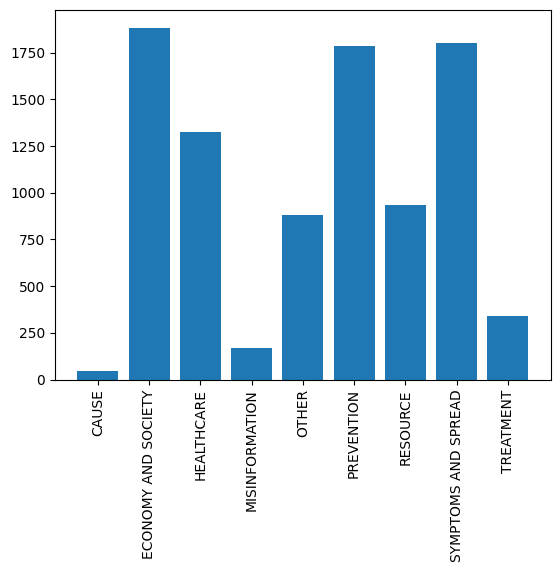

In [67]:
topics_partialmatch = {i: topics_partialmatch[i] for i in topicslist}

plt.bar(topics_partialmatch.keys(), topics_partialmatch.values(), align='center')
plt.xticks(rotation='vertical')

In [53]:
topics_nomatch

{'RESOURCE': 544,
 'PREVENTION': 315,
 'TREATMENT': 143,
 'HEALTHCARE': 641,
 'OTHER': 1257,
 'ECONOMY AND SOCIETY': 762,
 'SYMPTOMS AND SPREAD': 595,
 'MISINFORMATION': 40,
 'CAUSE': 10}

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'CAUSE'),
  Text(1, 0, 'ECONOMY AND SOCIETY'),
  Text(2, 0, 'HEALTHCARE'),
  Text(3, 0, 'MISINFORMATION'),
  Text(4, 0, 'OTHER'),
  Text(5, 0, 'PREVENTION'),
  Text(6, 0, 'RESOURCE'),
  Text(7, 0, 'SYMPTOMS AND SPREAD'),
  Text(8, 0, 'TREATMENT')])

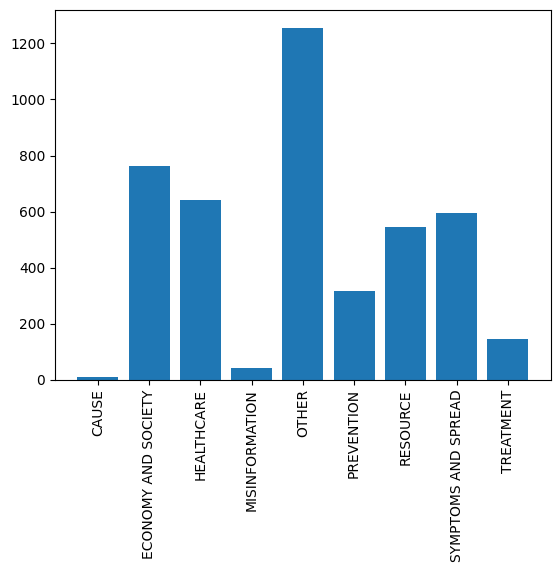

In [68]:
topics_nomatch = {i: topics_nomatch[i] for i in topicslist}

plt.bar(topics_nomatch.keys(), topics_nomatch.values(), align='center')
plt.xticks(rotation='vertical')


In [73]:
topics_all = {}

for x in agg.loc[agg['topics_full_match'] == True, ["tweet", "felicia_tung_topics", "jared_topics"]].values:
    
    for element in x[1].union(x[2]):
        if element not in topics_all:
            topics_all[element] = 1
        else:
            topics_all[element] += 1
            
for x in agg.loc[agg['topics_full_match'] == False, ["tweet", "felicia_tung_topics", "jared_topics"]].values:
    
    for element in x[1].union(x[2]):
        if element not in topics_all:
            topics_all[element] = 1
        else:
            topics_all[element] += 1

In [74]:
topics_all

{'OTHER': 3027,
 'ECONOMY AND SOCIETY': 3208,
 'HEALTHCARE': 2300,
 'PREVENTION': 2671,
 'SYMPTOMS AND SPREAD': 3028,
 'TREATMENT': 584,
 'MISINFORMATION': 228,
 'RESOURCE': 1629,
 'CAUSE': 65}

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'CAUSE'),
  Text(1, 0, 'ECONOMY AND SOCIETY'),
  Text(2, 0, 'HEALTHCARE'),
  Text(3, 0, 'MISINFORMATION'),
  Text(4, 0, 'OTHER'),
  Text(5, 0, 'PREVENTION'),
  Text(6, 0, 'RESOURCE'),
  Text(7, 0, 'SYMPTOMS AND SPREAD'),
  Text(8, 0, 'TREATMENT')])

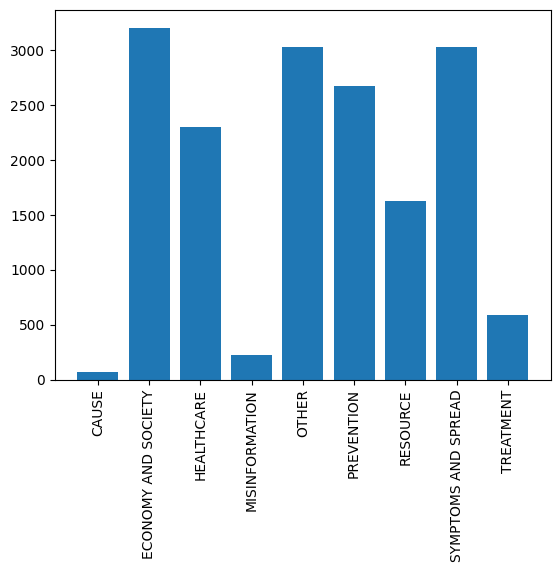

In [75]:
topics_all = {i: topics_all[i] for i in topicslist}

plt.bar(topics_all.keys(), topics_all.values(), align='center')
plt.xticks(rotation='vertical')

In [76]:
intents_fullmatch = {}
intents_partialmatch = {}
intents_nomatch = {}

for x in agg.loc[agg['intents_full_match'] == True, ["tweet", "felicia_tung_intents", "jared_intents"]].values:
    
    for element in x[1].union(x[2]):
        if element not in intents_fullmatch:
            intents_fullmatch[element] = 1
        else:
            intents_fullmatch[element] += 1


for x in agg.loc[agg['intents_partial_match'] == True, ["tweet", "felicia_tung_intents", "jared_intents"]].values:
    
    for element in x[1].union(x[2]):
        if element not in intents_partialmatch:
            intents_partialmatch[element] = 1
        else:
            intents_partialmatch[element] += 1


for x in agg.loc[agg['intents_no_match'] == True, ["tweet", "felicia_tung_intents", "jared_intents"]].values:
    
    for element in x[1].union(x[2]):
        if element not in intents_nomatch:
            intents_nomatch[element] = 1
        else:
            intents_nomatch[element] += 1


In [77]:
intents_fullmatch

{'CRITICIZE': 457,
 'PROVIDE INFORMATION': 1475,
 'RECOMMEND': 602,
 'PREDICT': 20,
 'PRAISE': 220,
 'CANNOT CODE': 56,
 'HONOR': 20,
 'SHARE STORY': 92,
 'PROMOTE OWN WORK': 46,
 'SEEK INFORMATION': 64,
 'OTHER': 21}

In [80]:
intentslist = list(intents_fullmatch.keys())
intentslist.sort()

intentslist

['CANNOT CODE',
 'CRITICIZE',
 'HONOR',
 'OTHER',
 'PRAISE',
 'PREDICT',
 'PROMOTE OWN WORK',
 'PROVIDE INFORMATION',
 'RECOMMEND',
 'SEEK INFORMATION',
 'SHARE STORY']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'CANNOT CODE'),
  Text(1, 0, 'CRITICIZE'),
  Text(2, 0, 'HONOR'),
  Text(3, 0, 'OTHER'),
  Text(4, 0, 'PRAISE'),
  Text(5, 0, 'PREDICT'),
  Text(6, 0, 'PROMOTE OWN WORK'),
  Text(7, 0, 'PROVIDE INFORMATION'),
  Text(8, 0, 'RECOMMEND'),
  Text(9, 0, 'SEEK INFORMATION'),
  Text(10, 0, 'SHARE STORY')])

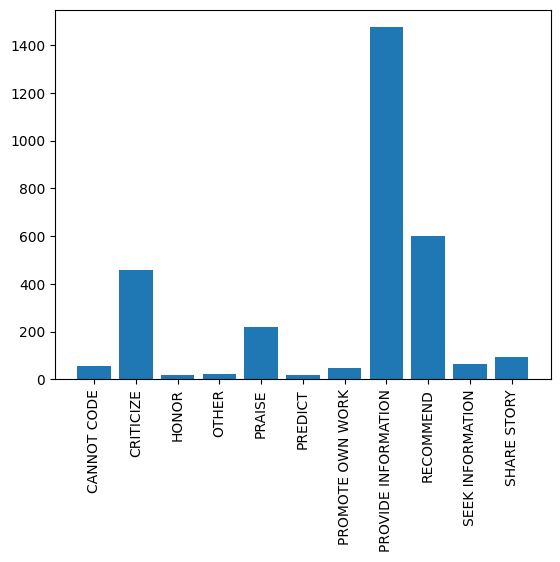

In [81]:
intents_fullmatch = {i: intents_fullmatch[i] for i in intentslist}

plt.bar(intents_fullmatch.keys(), intents_fullmatch.values(), align='center')
plt.xticks(rotation='vertical')

In [83]:
intents_partialmatch

{'RECOMMEND': 1188,
 'PROVIDE INFORMATION': 1672,
 'PRAISE': 497,
 'CRITICIZE': 959,
 'SHARE STORY': 294,
 'SEEK INFORMATION': 246,
 'PREDICT': 131,
 'PROMOTE OWN WORK': 130,
 'HONOR': 29,
 'OTHER': 49}

In [84]:
intents_partialmatch['CANNOT CODE'] = 0

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'CANNOT CODE'),
  Text(1, 0, 'CRITICIZE'),
  Text(2, 0, 'HONOR'),
  Text(3, 0, 'OTHER'),
  Text(4, 0, 'PRAISE'),
  Text(5, 0, 'PREDICT'),
  Text(6, 0, 'PROMOTE OWN WORK'),
  Text(7, 0, 'PROVIDE INFORMATION'),
  Text(8, 0, 'RECOMMEND'),
  Text(9, 0, 'SEEK INFORMATION'),
  Text(10, 0, 'SHARE STORY')])

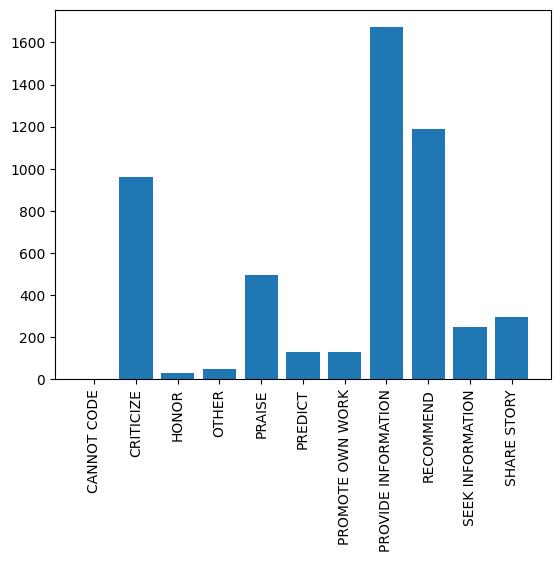

In [85]:
intents_partialmatch = {i: intents_partialmatch[i] for i in intentslist}

plt.bar(intents_partialmatch.keys(), intents_partialmatch.values(), align='center')
plt.xticks(rotation='vertical')

In [86]:
intents_nomatch

{'RECOMMEND': 1409,
 'PROVIDE INFORMATION': 1909,
 'SHARE STORY': 367,
 'PRAISE': 551,
 'PROMOTE OWN WORK': 193,
 'CRITICIZE': 714,
 'CANNOT CODE': 319,
 'OTHER': 282,
 'SEEK INFORMATION': 250,
 'PREDICT': 125,
 'HONOR': 33}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'CANNOT CODE'),
  Text(1, 0, 'CRITICIZE'),
  Text(2, 0, 'HONOR'),
  Text(3, 0, 'OTHER'),
  Text(4, 0, 'PRAISE'),
  Text(5, 0, 'PREDICT'),
  Text(6, 0, 'PROMOTE OWN WORK'),
  Text(7, 0, 'PROVIDE INFORMATION'),
  Text(8, 0, 'RECOMMEND'),
  Text(9, 0, 'SEEK INFORMATION'),
  Text(10, 0, 'SHARE STORY')])

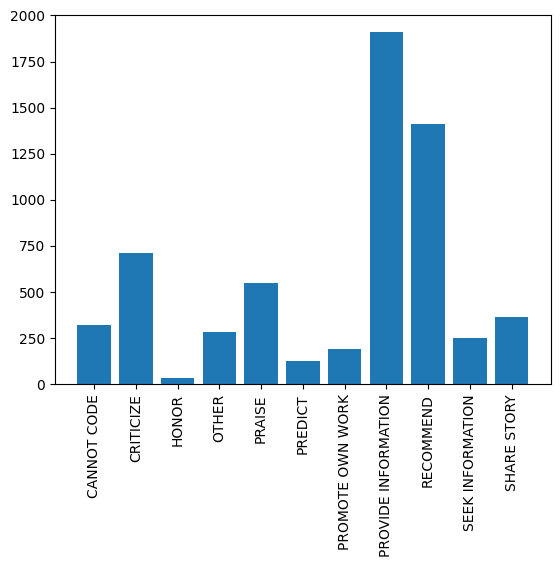

In [87]:
intents_nomatch = {i: intents_nomatch[i] for i in intentslist}

plt.bar(intents_nomatch.keys(), intents_nomatch.values(), align='center')
plt.xticks(rotation='vertical')

In [88]:
intents_all = {}

for x in agg.loc[agg['intents_full_match'] == True, ["tweet", "felicia_tung_intents", "jared_intents"]].values:
    
    for element in x[1].union(x[2]):
        if element not in intents_all:
            intents_all[element] = 1
        else:
            intents_all[element] += 1
            
for x in agg.loc[agg['intents_full_match'] == False, ["tweet", "felicia_tung_intents", "jared_intents"]].values:
    
    for element in x[1].union(x[2]):
        if element not in intents_all:
            intents_all[element] = 1
        else:
            intents_all[element] += 1


In [89]:
intents_all

{'CRITICIZE': 2130,
 'PROVIDE INFORMATION': 5056,
 'RECOMMEND': 3199,
 'PREDICT': 276,
 'PRAISE': 1268,
 'CANNOT CODE': 375,
 'HONOR': 82,
 'SHARE STORY': 753,
 'PROMOTE OWN WORK': 369,
 'SEEK INFORMATION': 560,
 'OTHER': 352}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'CANNOT CODE'),
  Text(1, 0, 'CRITICIZE'),
  Text(2, 0, 'HONOR'),
  Text(3, 0, 'OTHER'),
  Text(4, 0, 'PRAISE'),
  Text(5, 0, 'PREDICT'),
  Text(6, 0, 'PROMOTE OWN WORK'),
  Text(7, 0, 'PROVIDE INFORMATION'),
  Text(8, 0, 'RECOMMEND'),
  Text(9, 0, 'SEEK INFORMATION'),
  Text(10, 0, 'SHARE STORY')])

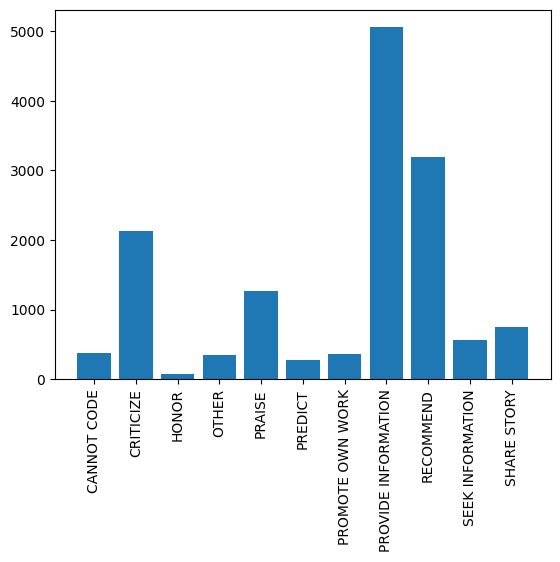

In [90]:
intents_all = {i: intents_all[i] for i in intentslist}

plt.bar(intents_all.keys(), intents_all.values(), align='center')
plt.xticks(rotation='vertical')


In [93]:
# co-occurrences of topics, intents
from itertools import combinations

cotopics = {}

for x in agg.loc[agg['topics_full_match'] == True, ["tweet", "felicia_tung_topics", "jared_topics"]].values:
    
    for element in combinations(list(x[1].union(x[2])), 2):
        if element not in cotopics:
            cotopics[element] = 1
        else:
            cotopics[element] += 1
            
for x in agg.loc[agg['topics_full_match'] == False, ["tweet", "felicia_tung_topics", "jared_topics"]].values:
    
    for element in combinations(list(x[1].union(x[2])), 2):
        if element not in cotopics:
            cotopics[element] = 1
        else:
            cotopics[element] += 1


In [97]:
from heapq import nlargest

res = dict(sorted(cotopics.items(), key = lambda x: x[1], reverse = True)[:10])
   
# printing result
res

{('ECONOMY AND SOCIETY', 'PREVENTION'): 1116,
 ('ECONOMY AND SOCIETY', 'OTHER'): 951,
 ('SYMPTOMS AND SPREAD', 'HEALTHCARE'): 774,
 ('ECONOMY AND SOCIETY', 'SYMPTOMS AND SPREAD'): 703,
 ('PREVENTION', 'SYMPTOMS AND SPREAD'): 655,
 ('ECONOMY AND SOCIETY', 'HEALTHCARE'): 520,
 ('OTHER', 'SYMPTOMS AND SPREAD'): 488,
 ('RESOURCE', 'OTHER'): 472,
 ('RESOURCE', 'PREVENTION'): 467,
 ('OTHER', 'HEALTHCARE'): 462}

In [98]:
# co-occurrences of intents
from itertools import combinations

cointents = {}

for x in agg.loc[agg['intents_full_match'] == True, ["tweet", "felicia_tung_intents", "jared_intents"]].values:
    
    for element in combinations(list(x[1].union(x[2])), 2):
        if element not in cointents:
            cointents[element] = 1
        else:
            cointents[element] += 1
            
for x in agg.loc[agg['intents_full_match'] == False, ["tweet", "felicia_tung_intents", "jared_intents"]].values:
    
    for element in combinations(list(x[1].union(x[2])), 2):
        if element not in cointents:
            cointents[element] = 1
        else:
            cointents[element] += 1

res = dict(sorted(cointents.items(), key = lambda x: x[1], reverse = True)[:10])
   
# printing result
res

{('RECOMMEND', 'PROVIDE INFORMATION'): 1548,
 ('PROVIDE INFORMATION', 'CRITICIZE'): 637,
 ('CRITICIZE', 'PROVIDE INFORMATION'): 544,
 ('RECOMMEND', 'PRAISE'): 499,
 ('RECOMMEND', 'CRITICIZE'): 436,
 ('SHARE STORY', 'PROVIDE INFORMATION'): 367,
 ('PROVIDE INFORMATION', 'PRAISE'): 319,
 ('SEEK INFORMATION', 'PROVIDE INFORMATION'): 250,
 ('PROVIDE INFORMATION', 'RECOMMEND'): 198,
 ('SHARE STORY', 'RECOMMEND'): 195}

In [106]:
from itertools import permutations

co = {}

for x in agg.loc[agg['intents_full_match'] == True, ["tweet", "felicia_tung_topics", "jared_topics", "felicia_tung_intents", "jared_intents"]].values:
    
    list_1 = list(x[1].union(x[2]))
    list_2 = list(x[3].union(x[4]))
              
    unique_combinations = []
 
    for i in range(len(list_1)):
        for j in range(len(list_2)):
            unique_combinations.append((list_1[i], list_2[j]))
    
    
    for element in unique_combinations:
        
        if element not in co:
            co[element] = 1
        else:
            co[element] += 1
            
for x in agg.loc[agg['intents_full_match'] == False, ["tweet", "felicia_tung_topics", "jared_topics", "felicia_tung_intents", "jared_intents"]].values:
    
    list_1 = list(x[1].union(x[2]))
    list_2 = list(x[3].union(x[4]))
              
    unique_combinations = []
 
    for i in range(len(list_1)):
        for j in range(len(list_2)):
            unique_combinations.append((list_1[i], list_2[j]))
              
    for element in unique_combinations:
        if element not in co:
            co[element] = 1
        else:
            co[element] += 1

res = dict(sorted(co.items(), key = lambda x: x[1], reverse = True)[:20])
   
# printing result
res

{('SYMPTOMS AND SPREAD', 'PROVIDE INFORMATION'): 2584,
 ('ECONOMY AND SOCIETY', 'PROVIDE INFORMATION'): 2129,
 ('PREVENTION', 'PROVIDE INFORMATION'): 2067,
 ('RESOURCE', 'RECOMMEND'): 1597,
 ('OTHER', 'PROVIDE INFORMATION'): 1506,
 ('ECONOMY AND SOCIETY', 'CRITICIZE'): 1502,
 ('HEALTHCARE', 'PROVIDE INFORMATION'): 1441,
 ('PREVENTION', 'RECOMMEND'): 1262,
 ('OTHER', 'RECOMMEND'): 1141,
 ('ECONOMY AND SOCIETY', 'RECOMMEND'): 1086,
 ('SYMPTOMS AND SPREAD', 'RECOMMEND'): 1071,
 ('HEALTHCARE', 'RECOMMEND'): 965,
 ('RESOURCE', 'PROVIDE INFORMATION'): 875,
 ('OTHER', 'CRITICIZE'): 782,
 ('SYMPTOMS AND SPREAD', 'CRITICIZE'): 731,
 ('PREVENTION', 'CRITICIZE'): 646,
 ('OTHER', 'PRAISE'): 586,
 ('HEALTHCARE', 'PRAISE'): 569,
 ('ECONOMY AND SOCIETY', 'PRAISE'): 515,
 ('TREATMENT', 'PROVIDE INFORMATION'): 492}

In [113]:
agg.head()

,time block,date,tweet id,tweet,felicia_tung_topics,jared_topics,felicia_tung_subtopics,jared_subtopics,topics_intersection,topics_full_match,topics_partial_match,topics_no_match,felicia_tung_intents,jared_intents,intents_intersection,intents_full_match,intents_partial_match,intents_no_match
0,6.0,12/11/20,1.340000e+18,Anthony Fauci offers a timeline for ending COV...,"{RESOURCE, OTHER, SYMPTOMS AND SPREAD, HEALTHC...","{RESOURCE, HEALTHCARE}","{OTHER: OTHER: a topic not mentioned above, RE...","{OTHER: OTHER: a topic not mentioned above, HE...","{RESOURCE, HEALTHCARE}",False,True,False,{RECOMMEND},"{RECOMMEND, PROVIDE INFORMATION}",{RECOMMEND},False,True,False
1,3.0,5/7/20,1.260000e+18,I think your trying to find reason in a place ...,{OTHER},{OTHER},{OTHER: CANNOT CODE: the topic cannot be deter...,{OTHER: CANNOT CODE: the topic cannot be deter...,{OTHER},True,False,False,{CRITICIZE},{CRITICIZE},{CRITICIZE},True,False,False
2,2.0,4/26/20,1.250000e+18,@RepSchneider @SBAgov @jimmy_dore @miserableli...,{ECONOMY AND SOCIETY},{ECONOMY AND SOCIETY},{ECONOMY AND SOCIETY: GOVERNMENT RESPONSE: how...,{ECONOMY AND SOCIETY: GOVERNMENT RESPONSE: how...,{ECONOMY AND SOCIETY},True,False,False,{CRITICIZE},{CRITICIZE},{CRITICIZE},True,False,False
3,3.0,6/22/20,1.270000e+18,COVID-19 and cancer https://t.co/d2ITRNl2vS ht...,"{RESOURCE, SYMPTOMS AND SPREAD}",{RESOURCE},{RESOURCE: RESOURCE: resources on COVID (resea...,{SYMPTOMS AND SPREAD: OTHER CONDITION: COVID i...,{RESOURCE},False,True,False,{RECOMMEND},{PROVIDE INFORMATION},{},False,False,True
4,5.0,10/31/20,1.320000e+18,Thank you @JoyYWu and @eozdalga! 2020 has been...,{HEALTHCARE},{HEALTHCARE},{HEALTHCARE: HEALTHCARE COLLABORATIONS: collab...,{HEALTHCARE: HEALTH ORGANIZATION: health organ...,{HEALTHCARE},True,False,False,"{PRAISE, CRITICIZE}",{PRAISE},{PRAISE},False,True,False


In [122]:
ccboth = 0
ccft = 0
ccjared = 0

for x in agg.loc[agg['intents_full_match'] == True, ["tweet", "felicia_tung_subtopics", "jared_subtopics"]].values:
    
    if other in x[1]:
        ccft += 1
    if other in x[2]:
        ccjared += 1
        
    if other in x[1] and other in x[2]:
        ccboth += 1
    
    
            
for x in agg.loc[agg['intents_full_match'] == False, ["tweet", "felicia_tung_subtopics", "jared_subtopics"]].values:
    

    if other in x[1]:
        ccft += 1
    if other in x[2]:
        ccjared += 1
        
    if other in x[1] and other in x[2]:
        ccboth += 1
    
        
        
print("OTHER: CANNOT CODE: ... in both annotations: ", ccboth)
print("OTHER: CANNOT CODE: ... in either annotation: ", ccft, ccjared)

OTHER: CANNOT CODE: ... in both annotations:  1181
OTHER: CANNOT CODE: ... in either annotation:  1181 1181
